In [1]:
import h5py
import os.path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gd
from utils.paths import SetupPaths
import matplotlib.patches as  mpatches
from matplotlib.ticker import FormatStrFormatter
from utils.get_summary_data import compile_summary
from utils.vectorCorrection import vectorCorrection as vector


paths = SetupPaths()

In [2]:
plt.show();
plt.rcParams.update({'font.size':20,"xtick.direction":"in","ytick.direction":"in", 
                     "xtick.top":True, "ytick.right":True,"text.usetex":False,
                     "xtick.labelsize":18,"ytick.labelsize":18})


In [3]:
# defining equivalent redshifts
zs = {"z":np.array([0,1,2,3,4]), 
#       "zill":np.array([135,85,68,60,56]), 
      "ztng":np.array([99,50,33,25,21])}

# defining color palette for plotting
palette = {"Illustris dark": "#009292", "Illustris hydro": "#B6DAFF",
           "TNG dark": "#930200", "TNG hydro": "#FFB5DC",
           "dwarf":"olive","massive":"salmon", "difference":"#2C1D11", "difference2":"#464646"}

alphas = {"maj": 0.7, "min": 0.3}


# Counts - primaries and pairs

In [6]:
f = h5py.File(f"{paths.path_plotdata}counts.hdf5",'r')
print(f['1000 Realizations']["massive"].keys())

f.close()

<KeysViewHDF5 ['Median All Pairs', 'Median Isolated Primaries', 'Median Major Fraction', 'Median Major Pairs', 'Median Minor Fraction', 'Median Minor Pairs', 'Median Noniso Primaries', 'Median Total Fraction', 'Median Total Primaries', 'Quarts All Pairs', 'Quarts Isolated Primaries', 'Quarts Major Fraction', 'Quarts Major Pairs', 'Quarts Minor Fraction', 'Quarts Minor Pairs', 'Quarts Noniso Primaries', 'Quarts Total Fraction', 'Quarts Total Primaries', 'z']>


In [4]:
def plot_counts(reals, save=False):
    
    f = h5py.File(f"{paths.path_plotdata}counts.hdf5",'r')
    counts = f[f"{reals} Realizations"]

    dict_d = {}
    for key,val in counts['dwarf'].items():
        dict_d[key] = np.array(val)

    dict_m = {}
    for key,val in counts['massive'].items():
        dict_m[key] = np.array(val)

    f.close()

    print(f"for {reals} realizations")
    
    ## plot of median counts and differences for illustris and tng
    fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey=False, sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,0.3],'wspace': 0.10,"hspace":0.04})

    axd = ax[0][0]
    axm = ax[0][1]
    axddiff = ax[1][0]
    axmdiff = ax[1][1]
    axd.set(title="Low mass", ylabel=r"N$_{\rm count}$ (thousands)")
    axm.set(title="High mass")
    axddiff.set(ylabel=r"N$_{\rm pair}$/N$_{\rm prim}$")

    ##############
    # dwarf plot #
    ##############
    axd.plot(dict_d['z'],dict_d['Median Total Primaries']/1000, color=palette["dwarf"], lw=3,label="Primaries")
    axd.plot(dict_d['z'],dict_d['Median All Pairs']/1000, color=palette["dwarf"], lw=3, linestyle="dashed",label="Pairs")

    axd.fill_between(dict_d['z'], np.array(dict_d['Quarts Total Primaries'])[:,0]/1000, np.array(dict_d['Quarts Total Primaries'])[:,1]/1000,color=palette["dwarf"],alpha=alphas["maj"])
    axd.fill_between(dict_d['z'], np.array(dict_d['Quarts All Pairs'])[:,0]/1000, np.array(dict_d['Quarts All Pairs'])[:,1]/1000,color=palette["dwarf"],alpha=alphas["min"])

    ################
    # massive plot #
    ################
    axm.plot(dict_m['z'],dict_m['Median Total Primaries']/1000, color=palette["massive"], lw=3, label="Primaries")
    axm.plot(dict_m['z'],dict_m['Median All Pairs']/1000, color=palette["massive"], lw=3, linestyle="dashed", label="Pairs")

    axm.fill_between(dict_m['z'], np.array(dict_m['Quarts Total Primaries'])[:,0]/1000, np.array(dict_m['Quarts Total Primaries'])[:,1]/1000,color=palette["massive"],alpha=alphas["maj"])
    axm.fill_between(dict_m['z'], np.array(dict_m['Quarts All Pairs'])[:,0]/1000, np.array(dict_m['Quarts All Pairs'])[:,1]/1000,color=palette["massive"],alpha=alphas["min"])

    ##############
    # dwarf diff #
    ##############
    axddiff.plot(dict_d['z'],dict_d['Median Total Fraction'], color=palette["dwarf"], lw=3,label="Primaries")
    axddiff.fill_between(dict_d['z'], np.array(dict_d['Quarts Total Fraction'])[:,0], np.array(dict_d['Quarts Total Fraction'])[:,1],color=palette["dwarf"],alpha=alphas["maj"])

    ################
    # massive diff #
    ################
    axmdiff.plot(dict_m['z'],dict_m['Median Total Fraction'], color=palette["massive"], lw=3)
    axmdiff.fill_between(dict_m['z'], np.array(dict_m['Quarts Total Fraction'])[:,0], np.array(dict_m['Quarts Total Fraction'])[:,1],color=palette["massive"],alpha=alphas["maj"])

    ################
    # Plot styling #
    ################
    for axx in ax[0]:
        leg = axx.legend(loc="upper right", fontsize=16)

    axm.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    fig.supxlabel("Redshift",y=0.04)
    if save:
        plt.savefig(f"{paths.path_plots}counts_{reals}.png",bbox_inches='tight',facecolor="white")
    plt.show()



for 1000 realizations


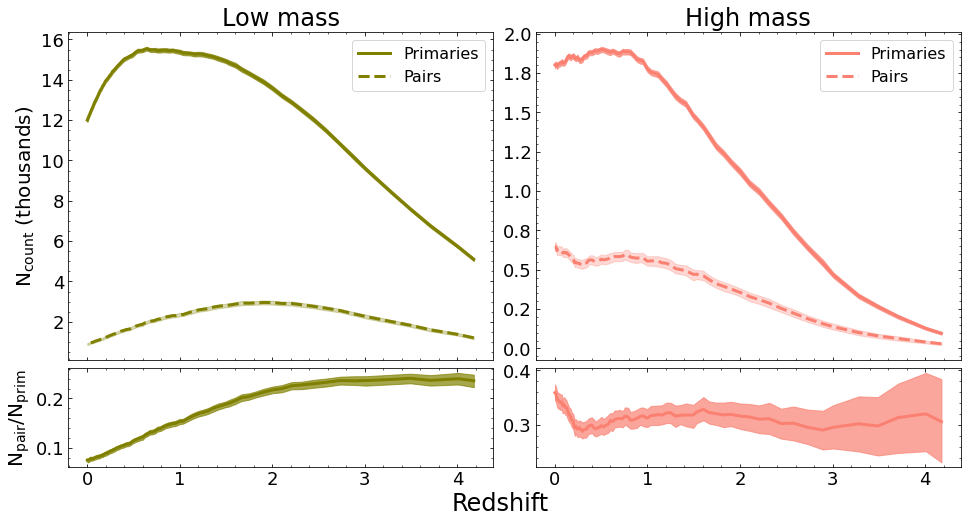

In [5]:
plot_counts(1000, save=True)

# SMR (stellar mass ratio) distribuition

In [6]:
def plot_smr(reals, save=False):
    
    f = h5py.File(f"{paths.path_plotdata}smr.hdf5",'r')
    smrdata = f[f"{reals} Realizations"]

    print(f"for {reals} realizations")
    
    fig, ax = plt.subplots(2,5,figsize=(16,8),sharey="row",sharex=True)
    # plt.subplots_adjust(wspace=0.01,hspace=0.01)
    plt.subplots_adjust(wspace=0,hspace=0.04)

    for i in range(5):
        dwarf = {}
        massive = {}
        
        for key,val in smrdata[f'z={i}']["dwarf"].items():
            dwarf[key] = np.array(val)
        for key,val in smrdata[f'z={i}']["massive"].items():
            massive[key] = np.array(val)
    
        bins_d = np.arange(0,1.05,0.05)
        bins_h = np.arange(0,1.05,0.05)

        ax[0][i].set_title(f"z = {i}")

        ax[0][i].hist(dwarf['major'],bins=bins_d, weights=np.ones(len(dwarf['major']))/ (len(dwarf['major']) + len(dwarf['minor'])), histtype="step", color=palette['dwarf'], lw=4, label='Major')
        ax[0][i].hist(dwarf['minor'],bins=bins_d, weights=np.ones(len(dwarf['minor']))/ (len(dwarf['major']) + len(dwarf['minor'])), histtype="step", color=palette['dwarf'], lw=3, linestyle='dotted', alpha=0.7, label='Minor')

        ax[1][i].hist(massive['major'],bins=bins_d, weights=np.ones(len(massive['major']))/(len(massive['major']) + len(massive['minor'])), histtype="step", color=palette['massive'], lw=4, label='Major')
        ax[1][i].hist(massive['minor'],bins=bins_d, weights=np.ones(len(massive['minor']))/(len(massive['major']) + len(massive['minor'])), histtype="step", color=palette['massive'], lw=3, linestyle='dotted', alpha=0.7, label='Minor')

    f.close()
    for xx in [ax[0][-1],ax[1][-1]]:
        leg = xx.legend(loc='upper right',fontsize=16)

    for i in range(5):
        ax[1][i].tick_params(axis='x', which='major', labelsize=18)
    for i in range(2):
        ax[i][0].tick_params(axis='y', which='major', labelsize=18)

    fig.supxlabel(r"Stellar mass ratio ($\rm M_{*2}/M_{*1}$)",y=0.03)
    ax[0][0].set_ylabel("Low mass",color=palette["dwarf"])
    ax[1][0].set_ylabel("High mass",color=palette["massive"])    
    fig.supylabel(r"P($\rm M_{*2}/M_{*1}$)",x=0.040)
    
    for i in ax:
        for j in i:
            j.set_xticks((0,0.5,1), labels=("0","0.5","1"))
    
    if save:
        plt.savefig(f"../plots/paper1/smrdist_{reals}.png",bbox_inches='tight',facecolor="white")
    plt.show()



for 1000 realizations


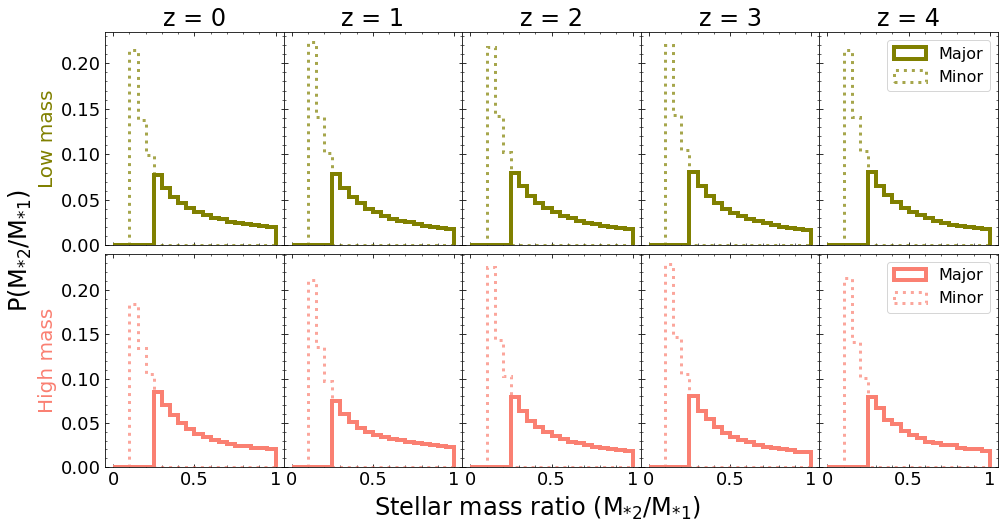

In [7]:
# plot_smr(10,False)
# plot_smr(100,False)
plot_smr(1000,True)

# Pair fraction

In [8]:
def plot_pairfrac(reals, save=False):
    
    f = h5py.File(f"{paths.path_plotdata}pairfrac.hdf5",'r')

    ratios = {}
    for key,val in f[f"{reals} Realizations"].items():
        ratios[key] = np.array(val)

    f.close()

    print(f"for {reals} realizations")
    
    ## plot of median counts and differences for illustris and tng
    fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey="row", sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,0.3],'wspace': 0.02,"hspace":0.04})

    ax_d = ax[0][0]
    ax_m = ax[0][1]
    ax_ddiff = ax[1][0]
    ax_mdiff = ax[1][1]
    ax_d.set(title="Major pairs", ylabel="Pair fraction")
    ax_m.set(title="Minor pairs")
    ax_ddiff.set(ylabel=r"High - Low")

    al = 0.7

    #############
    # dwarf #
    #############
    ax_d.plot(ratios['z'],ratios['Median Major Dwarf'], color=palette["dwarf"], lw=3, label="Low mass")
    ax_d.fill_between(ratios['z'], np.array(ratios['Quartile Major Dwarf'])[:,0], np.array(ratios['Quartile Major Dwarf'])[:,1],color=palette["dwarf"],alpha=al)


    ax_d.plot(ratios['z'],ratios['Median Major Massive'], color=palette["massive"], lw=3, label="High mass")
    ax_d.fill_between(ratios['z'], np.array(ratios['Quartile Major Massive'])[:,0], np.array(ratios['Quartile Major Massive'])[:,1],color=palette["massive"],alpha=al)

    ###########
    # massive #
    ###########
    ax_m.plot(ratios['z'],ratios['Median Minor Dwarf'], color=palette["dwarf"], lw=3, linestyle="dotted", label="Low mass")
    ax_m.fill_between(ratios['z'], np.array(ratios['Quartile Minor Dwarf'])[:,0], np.array(ratios['Quartile Minor Dwarf'])[:,1],color=palette["dwarf"],alpha=alphas["min"])


    ax_m.plot(ratios['z'],ratios['Median Minor Massive'], color=palette["massive"], lw=3, linestyle="dotted", label="High mass")
    ax_m.fill_between(ratios['z'], np.array(ratios['Quartile Minor Massive'])[:,0], np.array(ratios['Quartile Minor Massive'])[:,1],color=palette["massive"],alpha=alphas["min"])

    ### 
    ax_ddiff.plot(ratios['z'],ratios['Median Major Difference'], color="#2C1D11", lw=3)
    ax_ddiff.fill_between(ratios['z'], np.array(ratios['Quartile Major Difference'])[:,0], np.array(ratios['Quartile Major Difference'])[:,1],color="#2C1D11",alpha=al)

    ax_mdiff.plot(ratios['z'],ratios['Median Minor Difference'], color="#2C1D11", lw=3,linestyle="dotted")
    ax_mdiff.fill_between(ratios['z'], np.array(ratios['Quartile Minor Difference'])[:,0], np.array(ratios['Quartile Minor Difference'])[:,1],color="#2C1D11",alpha=0.3)

    ax_ddiff.axhline(0,color="black",lw=1,alpha=0.3)
    ax_mdiff.axhline(0,color="black",lw=1,alpha=0.3)
    # ax_m.axvline(ratios['z'][-19])

    #############
    #############
    for ax in [ax_d,ax_m]:
        leg = ax.legend(loc='lower right',fontsize=16)

    fig.supxlabel("Redshift",y=0.045)
    if save:
        plt.savefig(f"{paths.path_plots}pairfrac_{reals}.png",bbox_inches='tight',facecolor="white")
    plt.show()



for 1000 realizations


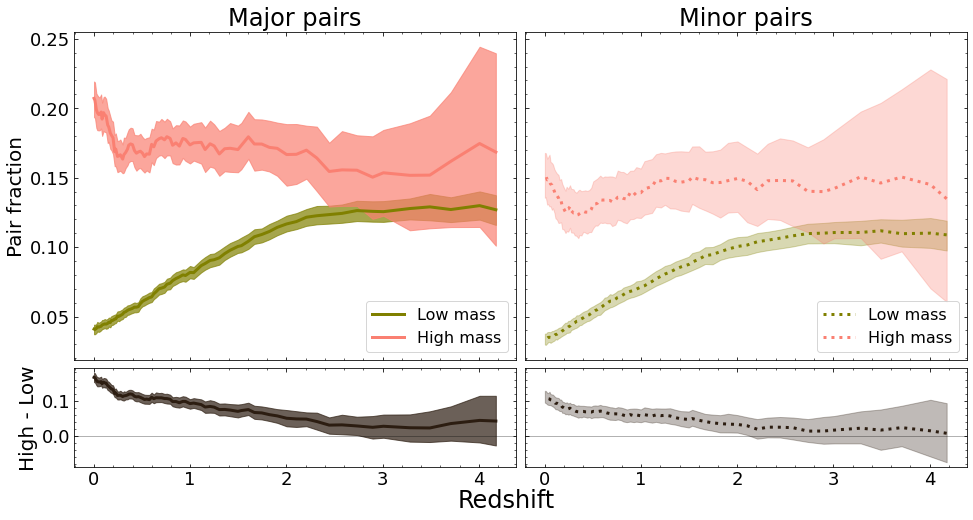

In [9]:
plot_pairfrac(1000,True)

# Separation cuts

## physical separation

In [19]:
h5py.File(f"{paths.path_plotdata}pairfrac_sepcut.hdf5",'r').close()

In [18]:
f.close()

In [4]:
f = h5py.File(f"{paths.path_plotdata}pairfrac_sepcut.hdf5",'r')

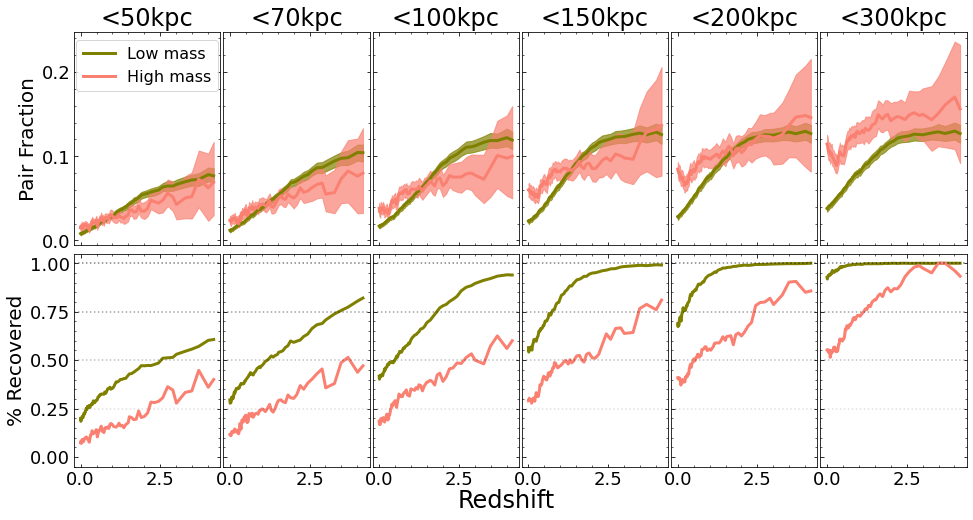

In [19]:
seps = [50,70,100,150, 200, 300]
# seps = [50,100,150, 300]
reals = 1000

fig, ax = plt.subplots(2, 6, figsize=(16,8), sharey="row", sharex=True, gridspec_kw={'width_ratios': [1,1,1,1,1,1], 'height_ratios':[1,1],'wspace': 0.02,"hspace":0.04})
ax[0][0].set(ylabel="Pair Fraction")
ax[1][0].set(ylabel="% Recovered")

for i,sepcut in enumerate(seps):
    f = h5py.File(f"{paths.path_plotdata}pairfrac_sepcut.hdf5",'r')

    ratios = {}
    for key,val in f[f"{reals} Realizations"][f'Sepcut {sepcut}kpc'].items(): 
        ratios[key] = np.array(val)

    f.close()
    ## plot of median counts and differences for illustris and tng

    ax_d = ax[0][i]
    ax_m = ax[1][i]
    # ax_ddiff = ax[1][0]
    # ax_mdiff = ax[1][1]

#     ax_d.set(title=r"$r_{\rm sep}$"+f"<{sepcut}kpc")
    ax_d.set(title=f"<{sepcut}kpc")
    # ax_m.set(title="Recovery rate")
    # ax_ddiff.set(ylabel=r"M - D")

    al = 0.7

    #############
    # dwarf #
    #############
    ax_d.plot(ratios['z'],ratios['Median Major Dwarf'], color=palette["dwarf"], lw=3, label="Low mass")
    ax_d.fill_between(ratios['z'], np.array(ratios['Quartile Major Dwarf'])[:,0], np.array(ratios['Quartile Major Dwarf'])[:,1],color=palette["dwarf"],alpha=al)


    ax_d.plot(ratios['z'],ratios['Median Major Massive'], color=palette["massive"], lw=3, label="High mass")
    ax_d.fill_between(ratios['z'], np.array(ratios['Quartile Major Massive'])[:,0], np.array(ratios['Quartile Major Massive'])[:,1],color=palette["massive"],alpha=al)

    ###########
    # massive #
    ###########
    ax_m.plot(ratios['z'],ratios['Frac Major Dwarf Recovered'], color=palette["dwarf"], lw=3, linestyle="solid", label="Dwarf")
    # ax_m.fill_between(ratios['z'], np.array(ratios['Quartile Major Dwarf Recovered'])[:,0], np.array(ratios['Quartile Minor Dwarf'])[:,1],color=palette["dwarf"],alpha=alphas["min"])


    ax_m.plot(ratios['z'],ratios['Frac Major Massive Recovered'], color=palette["massive"], lw=3, linestyle="solid", label="Massive")
    # ax_m.fill_between(ratios['z'], np.array(ratios['Quartile Major Massive Recovered'])[:,0], np.array(ratios['Quartile Minor Massive'])[:,1],color=palette["massive"],alpha=alphas["min"])

    ### 
    # ax_ddiff.plot(ratios['z'],ratios['Median Major Difference'], color="#2C1D11", lw=3)
    # ax_ddiff.fill_between(ratios['z'], np.array(ratios['Quartile Major Difference'])[:,0], np.array(ratios['Quartile Major Difference'])[:,1],color="#2C1D11",alpha=al)

    # ax_mdiff.plot(ratios['z'],ratios['Median Minor Difference'], color="#2C1D11", lw=3,linestyle="dotted")
    # ax_mdiff.fill_between(ratios['z'], np.array(ratios['Quartile Minor Difference'])[:,0], np.array(ratios['Quartile Minor Difference'])[:,1],color="#2C1D11",alpha=0.3)

    # ax_ddiff.axhline(0,color="black",lw=1,alpha=0.3)
    # ax_mdiff.axhline(0,color="black",lw=1,alpha=0.3)
    # ax_m.axvline(ratios['z'][-19])
    
    for l,j in enumerate([0,0.25,0.5,0.75,1]):
        ax_m.axhline(j,color='black',linestyle='dotted',alpha=l/8)

#############
#############
# for ax in [ax_d[0][0]]:
ax[0][0].legend(loc='upper center',fontsize=16)

fig.supxlabel("Redshift",y=0.045)

# if save:
plt.savefig(f"{paths.path_plots}pairfrac_sepcut.png",bbox_inches='tight',facecolor="white")
plt.show()

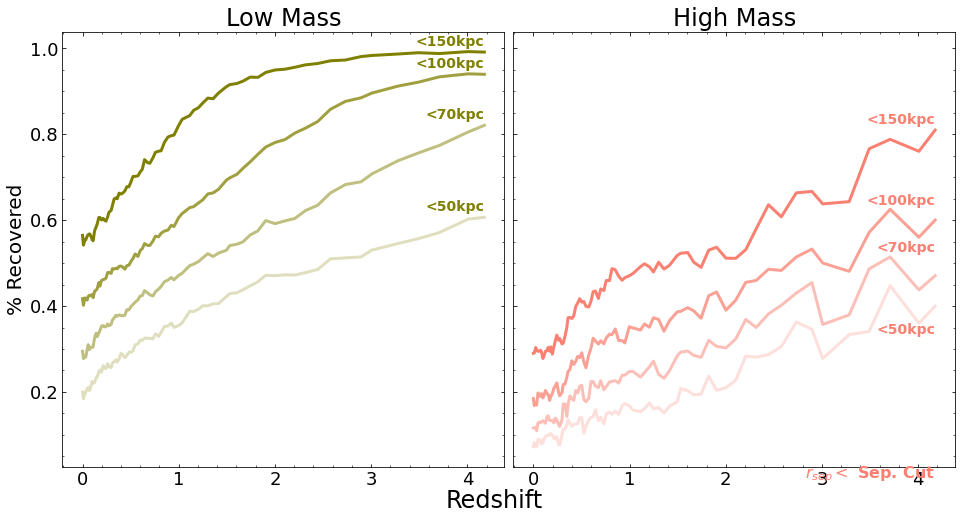

In [131]:
seps = [50,70,100,150,200,300]
seps = [50,70,100,150]
reals = 1000

fig, ax = plt.subplots(1, 2, figsize=(16,8), sharey="row", sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1],'wspace': 0.02,"hspace":0.04})
# ax[0].set(ylabel="Pair Fraction")
ax[0].set(ylabel="% Recovered")
ax[0].set(title=r"Low Mass")
ax[1].set(title=r"High Mass")

offset_dwarf = np.array([0, 0, 0, 0, 0, 0])+0.015
offset_massive = np.array([-0.08, 0.04, 0.02, 0, 0, 0])+0.015

for i,sepcut in enumerate(seps):
    f = h5py.File(f"{paths.path_plotdata}pairfrac_sepcut.hdf5",'r')

    ratios = {}
    for key,val in f[f"{reals} Realizations"][f'Sepcut {sepcut}kpc'].items(): 
        ratios[key] = np.array(val)

    f.close()
    ## plot of median counts and differences for illustris and tng

    ax_d = ax[0]
    ax_m = ax[1]
    # ax_ddiff = ax[1][0]
    # ax_mdiff = ax[1][1]

    # ax_m.set(title="Recovery rate")
    # ax_ddiff.set(ylabel=r"M - D")

    al = 0.7

    #############
    # dwarf #
    #############
    ax_d.plot(ratios['z'],ratios['Frac Major Dwarf Recovered'], color=palette["dwarf"], lw=3, alpha=i/len(seps)+(1/len(seps)))
    ax_d.text(ratios['z'][0], ratios['Frac Major Dwarf Recovered'][0]+offset_dwarf[i],f'<{sepcut}kpc', ha='right',fontsize=14, weight='bold', color=palette['dwarf']) 

    ###########
    # massive #
    ###########
    ax_m.plot(ratios['z'],ratios['Frac Major Massive Recovered'], color=palette["massive"], lw=3, linestyle="solid",alpha=i/len(seps)+(1/len(seps)))
    ax_m.text(ratios['z'][0], ratios['Frac Major Massive Recovered'][0]+offset_massive[i],f'<{sepcut}kpc', ha='right',fontsize=14, weight='bold', color=palette['massive'])

ax_m.text(ratios['z'][0], 0, r"$r_{sep} <$ Sep. Cut", ha='right',fontsize=16, weight='bold', color=palette['massive'])   
#############
#############
# for ax in [ax_d,ax_m]:
#     leg = ax.legend(loc='lower right',fontsize=16)

fig.supxlabel("Redshift",y=0.045)

# if save:
# plt.savefig(f"{paths.path_plots}pairfrac_sepcut.png",bbox_inches='tight',facecolor="white")
plt.show()

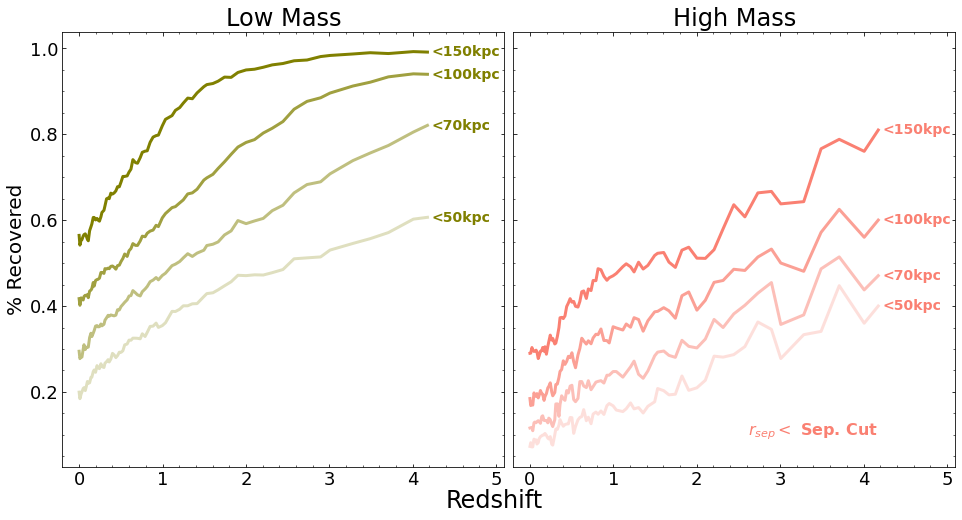

In [130]:
seps = [50,70,100,150,200,300]
seps = [50,70,100,150]
reals = 1000

fig, ax = plt.subplots(1, 2, figsize=(16,8), sharey="row", sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1],'wspace': 0.02,"hspace":0.04})
# ax[0].set(ylabel="Pair Fraction")
ax[0].set(ylabel="% Recovered")
ax[0].set(title=r"Low Mass",xlim=(-0.2,5.1))
ax[1].set(title=r"High Mass",xlim=(-0.2,5.1))

# offset_dwarf = np.array([0, 0, 0, 0, 0, 0])+0.015
# offset_massive = np.array([-0.1, 0.04, 0.02, 0, 0, 0])+0.015

for i,sepcut in enumerate(seps):
    f = h5py.File(f"{paths.path_plotdata}pairfrac_sepcut.hdf5",'r')

    ratios = {}
    for key,val in f[f"{reals} Realizations"][f'Sepcut {sepcut}kpc'].items(): 
        ratios[key] = np.array(val)

    f.close()
    ## plot of median counts and differences for illustris and tng

    ax_d = ax[0]
    ax_m = ax[1]
    # ax_ddiff = ax[1][0]
    # ax_mdiff = ax[1][1]

    # ax_m.set(title="Recovery rate")
    # ax_ddiff.set(ylabel=r"M - D")

    al = 0.7

    #############
    # dwarf #
    #############
    ax_d.plot(ratios['z'],ratios['Frac Major Dwarf Recovered'], color=palette["dwarf"], lw=3, alpha=i/len(seps)+(1/len(seps)))
    ax_d.text(ratios['z'][0]+0.05, ratios['Frac Major Dwarf Recovered'][0],f'<{sepcut}kpc', ha='left',va='center',fontsize=14, weight='bold', color=palette['dwarf']) 

    ###########
    # massive #
    ###########
    ax_m.plot(ratios['z'],ratios['Frac Major Massive Recovered'], color=palette["massive"], lw=3, linestyle="solid",alpha=i/len(seps)+(1/len(seps)))
    ax_m.text(ratios['z'][0]+0.05, ratios['Frac Major Massive Recovered'][0],f'<{sepcut}kpc', ha='left',va='center',fontsize=14, weight='bold', color=palette['massive'])

ax_m.text(ratios['z'][0], 0.1, r"$r_{sep} <$ Sep. Cut", ha='right',fontsize=16, weight='bold', color=palette['massive'])   
#############
#############
# for ax in [ax_d,ax_m]:
#     leg = ax.legend(loc='lower right',fontsize=16)

fig.supxlabel("Redshift",y=0.045)

# if save:
# plt.savefig(f"{paths.path_plots}pairfrac_sepcut.png",bbox_inches='tight',facecolor="white")
plt.show()

In [23]:
f = h5py.File(f"{paths.path_plotdata}pairfrac_vircut_full.hdf5",'r')

In [24]:
f.keys()

<KeysViewHDF5 ['10 Realizations', '100 Realizations', '1000 Realizations', 'Header']>

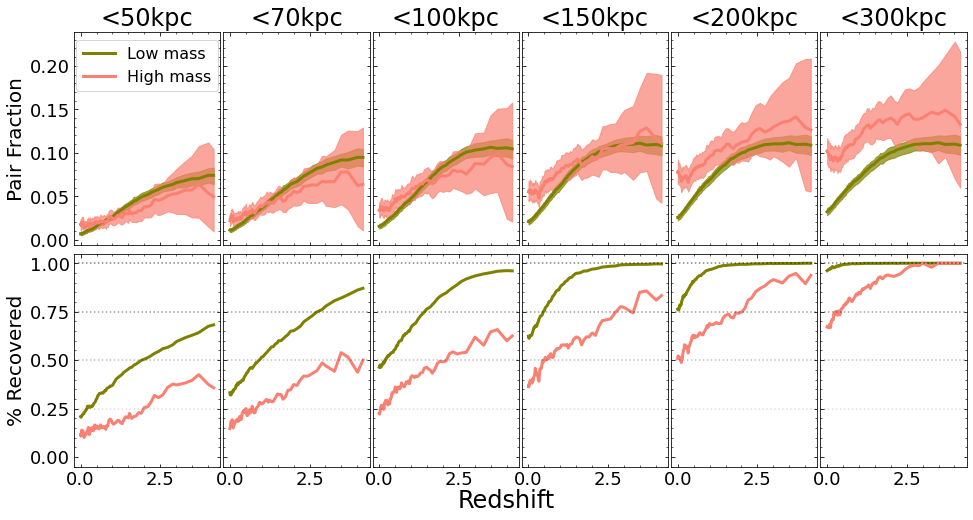

In [4]:
seps = [50,70,100,150, 200, 300]
# seps = [50,100,150, 300]
reals = 1000

fig, ax = plt.subplots(2, 6, figsize=(16,8), sharey="row", sharex=True, gridspec_kw={'width_ratios': [1,1,1,1,1,1], 'height_ratios':[1,1],'wspace': 0.02,"hspace":0.04})
ax[0][0].set(ylabel="Pair Fraction")
ax[1][0].set(ylabel="% Recovered")

for i,sepcut in enumerate(seps):
    f = h5py.File(f"{paths.path_plotdata}pairfrac_sepcut.hdf5",'r')

    ratios = {}
    for key,val in f[f"{reals} Realizations"][f'Sepcut {sepcut}kpc'].items(): 
        ratios[key] = np.array(val)

    f.close()
    ## plot of median counts and differences for illustris and tng

    ax_d = ax[0][i]
    ax_m = ax[1][i]
    # ax_ddiff = ax[1][0]
    # ax_mdiff = ax[1][1]

#     ax_d.set(title=r"$r_{\rm sep}$"+f"<{sepcut}kpc")
    ax_d.set(title=f"<{sepcut}kpc")
    # ax_m.set(title="Recovery rate")
    # ax_ddiff.set(ylabel=r"M - D")

    al = 0.7

    #############
    # dwarf #
    #############
    ax_d.plot(ratios['z'],ratios['Median Minor Dwarf'], color=palette["dwarf"], lw=3, label="Low mass")
    ax_d.fill_between(ratios['z'], np.array(ratios['Quartile Minor Dwarf'])[:,0], np.array(ratios['Quartile Minor Dwarf'])[:,1],color=palette["dwarf"],alpha=al)


    ax_d.plot(ratios['z'],ratios['Median Minor Massive'], color=palette["massive"], lw=3, label="High mass")
    ax_d.fill_between(ratios['z'], np.array(ratios['Quartile Minor Massive'])[:,0], np.array(ratios['Quartile Minor Massive'])[:,1],color=palette["massive"],alpha=al)

    ###########
    # massive #
    ###########
    ax_m.plot(ratios['z'],ratios['Frac Minor Dwarf Recovered'], color=palette["dwarf"], lw=3, linestyle="solid", label="Dwarf")
    # ax_m.fill_between(ratios['z'], np.array(ratios['Quartile Minor Dwarf Recovered'])[:,0], np.array(ratios['Quartile Minor Dwarf'])[:,1],color=palette["dwarf"],alpha=alphas["min"])


    ax_m.plot(ratios['z'],ratios['Frac Minor Massive Recovered'], color=palette["massive"], lw=3, linestyle="solid", label="Massive")
    # ax_m.fill_between(ratios['z'], np.array(ratios['Quartile Minor Massive Recovered'])[:,0], np.array(ratios['Quartile Minor Massive'])[:,1],color=palette["massive"],alpha=alphas["min"])

    ### 
    # ax_ddiff.plot(ratios['z'],ratios['Median Minor Difference'], color="#2C1D11", lw=3)
    # ax_ddiff.fill_between(ratios['z'], np.array(ratios['Quartile Minor Difference'])[:,0], np.array(ratios['Quartile Minor Difference'])[:,1],color="#2C1D11",alpha=al)

    # ax_mdiff.plot(ratios['z'],ratios['Median Minor Difference'], color="#2C1D11", lw=3,linestyle="dotted")
    # ax_mdiff.fill_between(ratios['z'], np.array(ratios['Quartile Minor Difference'])[:,0], np.array(ratios['Quartile Minor Difference'])[:,1],color="#2C1D11",alpha=0.3)

    # ax_ddiff.axhline(0,color="black",lw=1,alpha=0.3)
    # ax_mdiff.axhline(0,color="black",lw=1,alpha=0.3)
    # ax_m.axvline(ratios['z'][-19])
    
    for l,j in enumerate([0,0.25,0.5,0.75,1]):
        ax_m.axhline(j,color='black',linestyle='dotted',alpha=l/8)

#############
#############
# for ax in [ax_d[0][0]]:
ax[0][0].legend(loc='upper center',fontsize=16)

fig.supxlabel("Redshift",y=0.045)

# if save:
plt.savefig(f"{paths.path_plots}pairfrac_sepcut_minor.png",bbox_inches='tight',facecolor="white")
plt.show()

## virial radius 

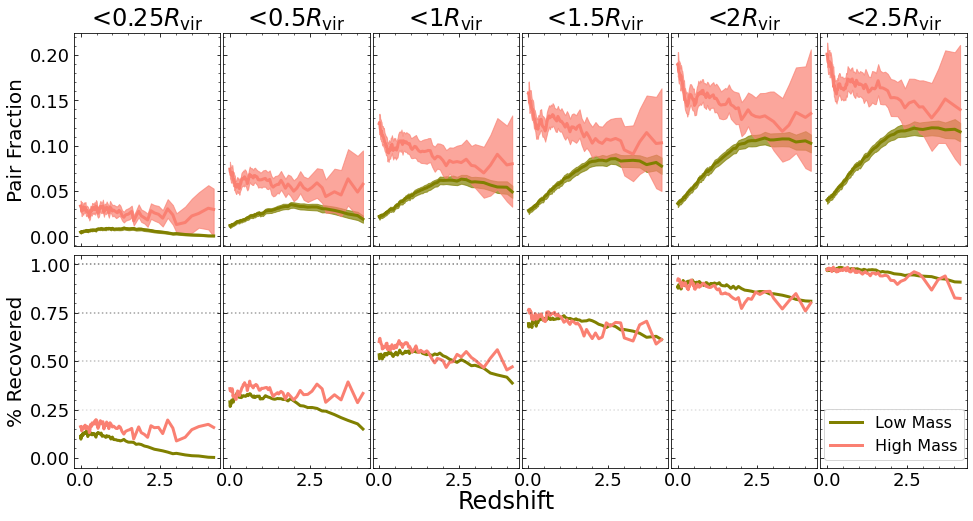

In [27]:
vircuts = [0.25,0.5,1,1.5,2,2.5]
reals = 1000

fig, ax = plt.subplots(2, 6, figsize=(16,8), sharey="row", sharex=True, gridspec_kw={'width_ratios': [1,1,1,1,1,1], 'height_ratios':[1,1],'wspace': 0.02,"hspace":0.04})
ax[0][0].set(ylabel="Pair Fraction")
ax[1][0].set(ylabel="% Recovered")

for i,vircut in enumerate(vircuts):
    f = h5py.File(f"{paths.path_plotdata}pairfrac_vircut_full.hdf5",'r')

    ratios = {}
    for key,val in f[f"{reals} Realizations"][f'Vircut {vircut}'].items(): 
        ratios[key] = np.array(val)

    f.close()
    ## plot of median counts and differences for illustris and tng

    ax_d = ax[0][i]
    ax_m = ax[1][i]
    # ax_ddiff = ax[1][0]
    # ax_mdiff = ax[1][1]

    ax_d.set(title=f"<{vircut}"+r"$R_{\rm vir}$")
    # ax_m.set(title="Recovery rate")
    # ax_ddiff.set(ylabel=r"M - D")

    al = 0.7

    #############
    # dwarf #
    #############
    ax_d.plot(ratios['z'],ratios['Median Major Dwarf'], color=palette["dwarf"], lw=3, label="Dwarf")
    ax_d.fill_between(ratios['z'], np.array(ratios['Quartile Major Dwarf'])[:,0], np.array(ratios['Quartile Major Dwarf'])[:,1],color=palette["dwarf"],alpha=al)


    ax_d.plot(ratios['z'],ratios['Median Major Massive'], color=palette["massive"], lw=3, label="Massive")
    ax_d.fill_between(ratios['z'], np.array(ratios['Quartile Major Massive'])[:,0], np.array(ratios['Quartile Major Massive'])[:,1],color=palette["massive"],alpha=al)

    ###########
    # massive #
    ###########
    ax_m.plot(ratios['z'],ratios['Frac Major Dwarf Recovered'], color=palette["dwarf"], lw=3, linestyle="solid", label="Low Mass")
    # ax_m.fill_between(ratios['z'], np.array(ratios['Quartile Major Dwarf Recovered'])[:,0], np.array(ratios['Quartile Minor Dwarf'])[:,1],color=palette["dwarf"],alpha=alphas["min"])


    ax_m.plot(ratios['z'],ratios['Frac Major Massive Recovered'], color=palette["massive"], lw=3, linestyle="solid", label="High Mass")
    # ax_m.fill_between(ratios['z'], np.array(ratios['Quartile Major Massive Recovered'])[:,0], np.array(ratios['Quartile Minor Massive'])[:,1],color=palette["massive"],alpha=alphas["min"])

    for i, j in enumerate([0,0.25,0.5,0.75,1]):
        ax_m.axhline(j,color='black',linestyle='dotted',alpha=i/8)
    
    ### 
    # ax_ddiff.plot(ratios['z'],ratios['Median Major Difference'], color="#2C1D11", lw=3)
    # ax_ddiff.fill_between(ratios['z'], np.array(ratios['Quartile Major Difference'])[:,0], np.array(ratios['Quartile Major Difference'])[:,1],color="#2C1D11",alpha=al)

    # ax_mdiff.plot(ratios['z'],ratios['Median Minor Difference'], color="#2C1D11", lw=3,linestyle="dotted")
    # ax_mdiff.fill_between(ratios['z'], np.array(ratios['Quartile Minor Difference'])[:,0], np.array(ratios['Quartile Minor Difference'])[:,1],color="#2C1D11",alpha=0.3)

    # ax_ddiff.axhline(0,color="black",lw=1,alpha=0.3)
    # ax_mdiff.axhline(0,color="black",lw=1,alpha=0.3)
    # ax_m.axvline(ratios['z'][-19])

#############
#############
ax_m.legend(loc='lower center',fontsize=16)
    
fig.supxlabel("Redshift",y=0.045)

# if save:
plt.savefig(f"{paths.path_plots}pairfrac_vircut.png",bbox_inches='tight',facecolor="white")
plt.show()

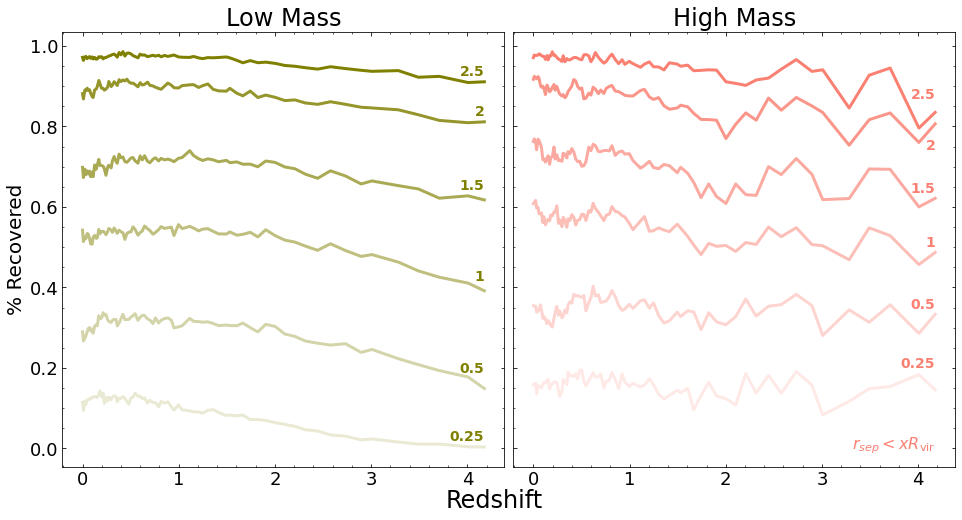

In [107]:
vircuts = [0.25,0.5,1,1.5,2,2.5]
reals = 10

fig, ax = plt.subplots(1, 2, figsize=(16,8), sharey="row", sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1],'wspace': 0.02,"hspace":0.04})
# ax[0].set(ylabel="Pair Fraction")
ax[0].set(ylabel="% Recovered")
ax[0].set(title=r"Low Mass")#,xlim=(-0.2,ratios['z'][0]+0.3))
ax[1].set(title=r"High Mass")#,xlim=(-0.2,ratios['z'][0]+0.3))

offset_dwarf = np.array([0, 0.025, 0.01, 0.01, 0, 0])+0.015
offset_massive = np.array([0.04, 0, 0, 0, -0.08, 0.02])+0.015


for i,vircut in enumerate(vircuts):
    f = h5py.File(f"{paths.path_plotdata}pairfrac_vircut.hdf5",'r')

    ratios = {}
    for key,val in f[f"{reals} Realizations"][f'Vircut {vircut}'].items(): 
        ratios[key] = np.array(val)

    f.close()

    ax_d = ax[0]
    ax_m = ax[1]

    al = 0.7

    #############
    # dwarf #
    #############
    ax_d.plot(ratios['z'],ratios['Frac Major Dwarf Recovered'], color=palette["dwarf"], lw=3, alpha=i/len(vircuts)+(1/len(vircuts)))
    ax_d.text(ratios['z'][0], ratios['Frac Major Dwarf Recovered'][0]+offset_dwarf[i],f'{vircut}', ha='right',fontsize=14, weight='bold', color=palette['dwarf']) 
              #bbox={'facecolor': 'white', 'alpha': 1, 'pad': -1,'edgecolor':'white'})

    ###########
    # massive #
    ###########
    ax_m.plot(ratios['z'],ratios['Frac Major Massive Recovered'], color=palette["massive"], lw=3, linestyle="solid",alpha=i/len(vircuts)+(1/len(vircuts)))
    ax_m.text(ratios['z'][0], ratios['Frac Major Massive Recovered'][0]+offset_massive[i],f'{vircut}', ha='right',fontsize=14, weight='bold', color=palette['massive'])
        
ax_m.text(ratios['z'][0], 0, r"$r_{sep} < xR_{\rm vir}$", ha='right',fontsize=16, weight='bold', color=palette['massive']) 
#############
#############
fig.supxlabel("Redshift",y=0.045)

# if save:
# plt.savefig(f"{paths.path_plots}pairfrac_sepcut.png",bbox_inches='tight',facecolor="white")
plt.show()

In [37]:
ratios['z'][1]

4.0079451114652676

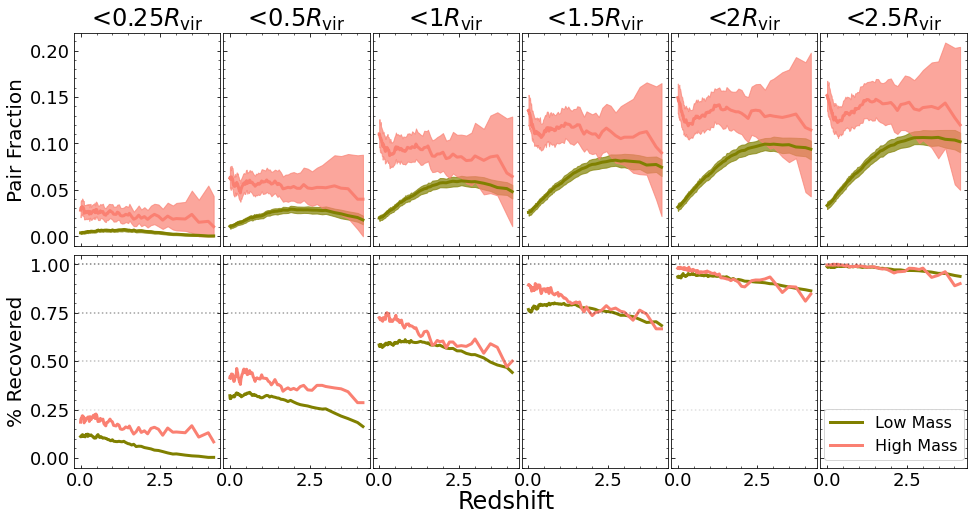

In [5]:
vircuts = [0.25,0.5,1,1.5,2,2.5]
reals = 1000

fig, ax = plt.subplots(2, 6, figsize=(16,8), sharey="row", sharex=True, gridspec_kw={'width_ratios': [1,1,1,1,1,1], 'height_ratios':[1,1],'wspace': 0.02,"hspace":0.04})
ax[0][0].set(ylabel="Pair Fraction")
ax[1][0].set(ylabel="% Recovered")

for i,vircut in enumerate(vircuts):
    f = h5py.File(f"{paths.path_plotdata}pairfrac_vircut_full.hdf5",'r')

    ratios = {}
    for key,val in f[f"{reals} Realizations"][f'Vircut {vircut}'].items(): 
        ratios[key] = np.array(val)

    f.close()
    ## plot of median counts and differences for illustris and tng

    ax_d = ax[0][i]
    ax_m = ax[1][i]
    # ax_ddiff = ax[1][0]
    # ax_mdiff = ax[1][1]

    ax_d.set(title=f"<{vircut}"+r"$R_{\rm vir}$")
    # ax_m.set(title="Recovery rate")
    # ax_ddiff.set(ylabel=r"M - D")

    al = 0.7

    #############
    # dwarf #
    #############
    ax_d.plot(ratios['z'],ratios['Median Minor Dwarf'], color=palette["dwarf"], lw=3, label="Dwarf")
    ax_d.fill_between(ratios['z'], np.array(ratios['Quartile Minor Dwarf'])[:,0], np.array(ratios['Quartile Minor Dwarf'])[:,1],color=palette["dwarf"],alpha=al)


    ax_d.plot(ratios['z'],ratios['Median Minor Massive'], color=palette["massive"], lw=3, label="Massive")
    ax_d.fill_between(ratios['z'], np.array(ratios['Quartile Minor Massive'])[:,0], np.array(ratios['Quartile Minor Massive'])[:,1],color=palette["massive"],alpha=al)

    ###########
    # massive #
    ###########
    ax_m.plot(ratios['z'],ratios['Frac Minor Dwarf Recovered'], color=palette["dwarf"], lw=3, linestyle="solid", label="Low Mass")
    # ax_m.fill_between(ratios['z'], np.array(ratios['Quartile Minor Dwarf Recovered'])[:,0], np.array(ratios['Quartile Minor Dwarf'])[:,1],color=palette["dwarf"],alpha=alphas["min"])


    ax_m.plot(ratios['z'],ratios['Frac Minor Massive Recovered'], color=palette["massive"], lw=3, linestyle="solid", label="High Mass")
    # ax_m.fill_between(ratios['z'], np.array(ratios['Quartile Minor Massive Recovered'])[:,0], np.array(ratios['Quartile Minor Massive'])[:,1],color=palette["massive"],alpha=alphas["min"])

    for i, j in enumerate([0,0.25,0.5,0.75,1]):
        ax_m.axhline(j,color='black',linestyle='dotted',alpha=i/8)
    
    ### 
    # ax_ddiff.plot(ratios['z'],ratios['Median Minor Difference'], color="#2C1D11", lw=3)
    # ax_ddiff.fill_between(ratios['z'], np.array(ratios['Quartile Minor Difference'])[:,0], np.array(ratios['Quartile Minor Difference'])[:,1],color="#2C1D11",alpha=al)

    # ax_mdiff.plot(ratios['z'],ratios['Median Minor Difference'], color="#2C1D11", lw=3,linestyle="dotted")
    # ax_mdiff.fill_between(ratios['z'], np.array(ratios['Quartile Minor Difference'])[:,0], np.array(ratios['Quartile Minor Difference'])[:,1],color="#2C1D11",alpha=0.3)

    # ax_ddiff.axhline(0,color="black",lw=1,alpha=0.3)
    # ax_mdiff.axhline(0,color="black",lw=1,alpha=0.3)
    # ax_m.axvline(ratios['z'][-19])

#############
#############
ax_m.legend(loc='lower center',fontsize=16)
    
fig.supxlabel("Redshift",y=0.045)

# if save:
plt.savefig(f"{paths.path_plots}pairfrac_vircut_minor.png",bbox_inches='tight',facecolor="white")
plt.show()

# Literature comparison

In [70]:
redshift = [0.25, 0.75, 1.25, 
            1.75, 2.25, 3, 
            4, 5.5]

subfind_full = np.array([0.28408361844787400, 0.3967792682835680, 0.3105562443495830, 
                0.2548518480347080, 0.43983420079419700, 0.34714255831491100, 
                0.3711320119287430, 0.21564351220864500])
subfind_detection = np.array([0.16008590055114600, 0.3301736741546460, 0.26277792288463100, 
                     0.23118845501327600, 0.3413915132625050, 0.2499329172046900, 
                     0.310556244349583, 0.12883571609350400])
source_detection = np.array([0.48756106896697400, 0.3732044346340160, 0.3376105125784730, 
                    0.28093731775220400, 0.41255098653991600, 0.310556244349583, 
                    0.35993769212646000, 0.17258426971826300])

normed_subfind_full = subfind_full/max(subfind_full)
normed_subfind_detection = subfind_detection/max(subfind_detection)
normed_source_detection = source_detection/max(source_detection)

shifted_subfind_full = subfind_full+(1-subfind_full[1])
shifted_subfind_detection = subfind_detection+(1-subfind_detection[1])
shifted_source_detection = source_detection+(1-source_detection[1])

normshift_subfind_full = normed_subfind_full+(1-normed_subfind_full[1])
normshift_subfind_detection = normed_subfind_detection+(1-normed_subfind_detection[1])
normshift_source_detection = normed_source_detection+(1-normed_source_detection[1])


In [52]:
scale_z = 0.75
f = h5py.File(f"{paths.path_plotdata}pairfrac.hdf5",'r')

ratios = {}
for key,val in f[f"1000 Realizations"].items():
    ratios[key] = np.array(val)
f.close()

zs = ratios['z']
scale_ind = np.argmin(np.abs(zs-scale_z))

g = h5py.File(f"{paths.path_plotdata}pairfrac_sepcut.hdf5",'r')

sepcut = {}
for key,val in g[f"1000 Realizations"][f'Sepcut 70kpc'].items(): 
    sepcut[key] = np.array(val)

g.close()

### norm by max

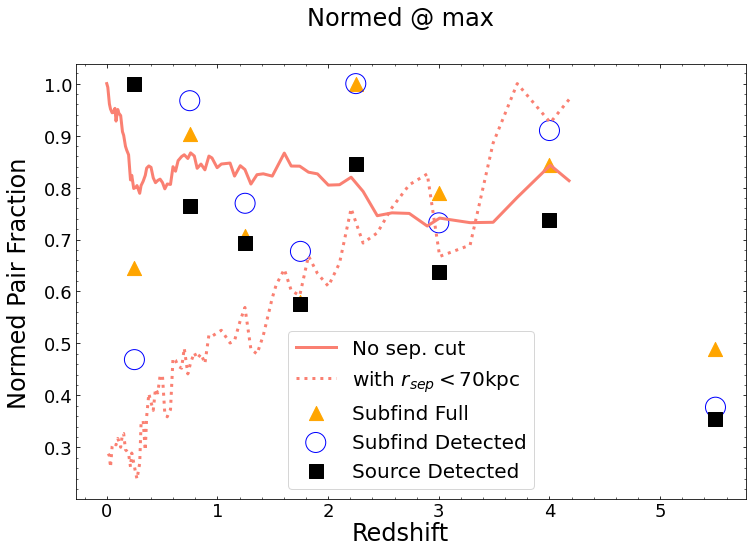

In [108]:
# Norm from max 
fig, ax = plt.subplots(1, 1, figsize=(12,8), sharey="row", sharex=True, gridspec_kw={'width_ratios': [1], 'height_ratios':[1],'wspace': 0.02,"hspace":0.04})
al = 0.7

    # 
meds = np.array(ratios['Median Major Massive'])
quart_low = np.array(ratios['Quartile Major Massive'])[:,0]
quart_high = np.array(ratios['Quartile Major Massive'])[:,1]


ax.plot(ratios['z'],(meds/max(meds)), color=palette["massive"], lw=3, label="No sep. cut")
# ax.fill_between(ratios['z'], quart_low+(1-meds[36]), quart_high+(1-meds[36]),color=palette["massive"],alpha=al)

    # 
meds = np.array(sepcut['Median Major Massive'])
quart_low = np.array(sepcut['Quartile Major Massive'])[:,0]
quart_high = np.array(sepcut['Quartile Major Massive'])[:,1]

ax.plot(sepcut['z'],(meds/max(meds)), color=palette["massive"], linestyle='dotted',lw=3, label=r"with $r_{sep}<70$kpc")
# ax.fill_between(sepcut['z'], quart_low+(1-meds[36]), quart_high+(1-meds[36]),color=palette["massive"],alpha=0.3)

    # 
normed_subfind_full = subfind_full/max(subfind_full)
normed_subfind_detection = subfind_detection/max(subfind_detection)
normed_source_detection = source_detection/max(source_detection)

plt.scatter(redshift,normed_subfind_full,s=200,marker="^",c='orange',label="Subfind Full")
plt.scatter(redshift,normed_subfind_detection,s=400,facecolors='none', edgecolors='blue',label="Subfind Detected")
plt.scatter(redshift,normed_source_detection,s=200,marker='s',color='black',label="Source Detected")

plt.legend()
fig.suptitle("Normed @ max")
fig.supxlabel("Redshift",y=0.045)
fig.supylabel("Normed Pair Fraction",x=0.045)

# if save:
# plt.savefig(f"{paths.path_plots}pairfrac_sepcut.png",bbox_inches='tight',facecolor="white")
plt.show()

### norm at z=0.75

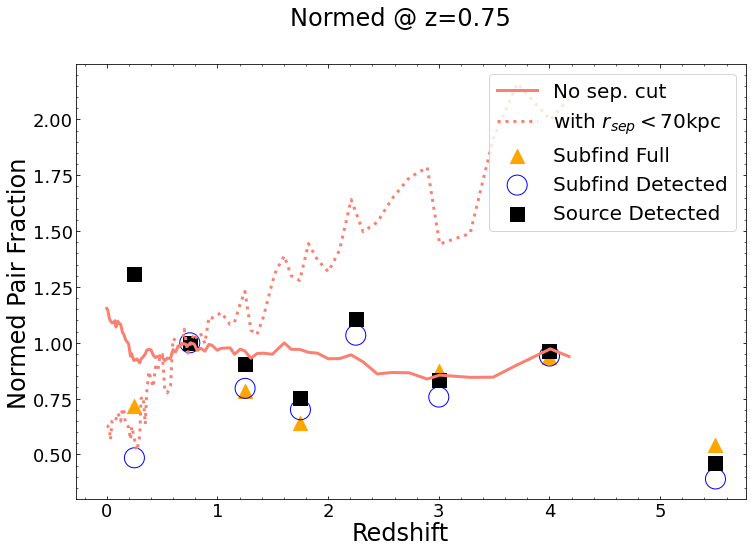

In [107]:
# Norm from z=0.75
fig, ax = plt.subplots(1, 1, figsize=(12,8), sharey="row", sharex=True, gridspec_kw={'width_ratios': [1], 'height_ratios':[1],'wspace': 0.02,"hspace":0.04})
al = 0.7

    # 
meds = np.array(ratios['Median Major Massive'])
quart_low = np.array(ratios['Quartile Major Massive'])[:,0]
quart_high = np.array(ratios['Quartile Major Massive'])[:,1]


ax.plot(ratios['z'],(meds/meds[36]), color=palette["massive"], lw=3, label="No sep. cut")
# ax.fill_between(ratios['z'], quart_low+(1-meds[36]), quart_high+(1-meds[36]),color=palette["massive"],alpha=al)

    # 
meds = np.array(sepcut['Median Major Massive'])
quart_low = np.array(sepcut['Quartile Major Massive'])[:,0]
quart_high = np.array(sepcut['Quartile Major Massive'])[:,1]

ax.plot(sepcut['z'],(meds/meds[36]), color=palette["massive"], linestyle='dotted',lw=3, label=r"with $r_{sep}<70$kpc")
# ax.fill_between(sepcut['z'], quart_low+(1-meds[36]), quart_high+(1-meds[36]),color=palette["massive"],alpha=0.3)

    # 
normed_subfind_full = subfind_full/subfind_full[1]
normed_subfind_detection = subfind_detection/subfind_detection[1]
normed_source_detection = source_detection/source_detection[1]

plt.scatter(redshift,normed_subfind_full,s=200,marker="^",c='orange',label="Subfind Full")
plt.scatter(redshift,normed_subfind_detection,s=400,facecolors='none', edgecolors='blue',label="Subfind Detected")
plt.scatter(redshift,normed_source_detection,s=200,marker='s',color='black',label="Source Detected")

plt.legend(loc="upper right")
fig.suptitle("Normed @ z=0.75")
fig.supxlabel("Redshift",y=0.045)
fig.supylabel("Normed Pair Fraction",x=0.045)

# if save:
# plt.savefig(f"{paths.path_plots}pairfrac_sepcut.png",bbox_inches='tight',facecolor="white")
plt.show()

### Normed by max and shifted to z=0.75

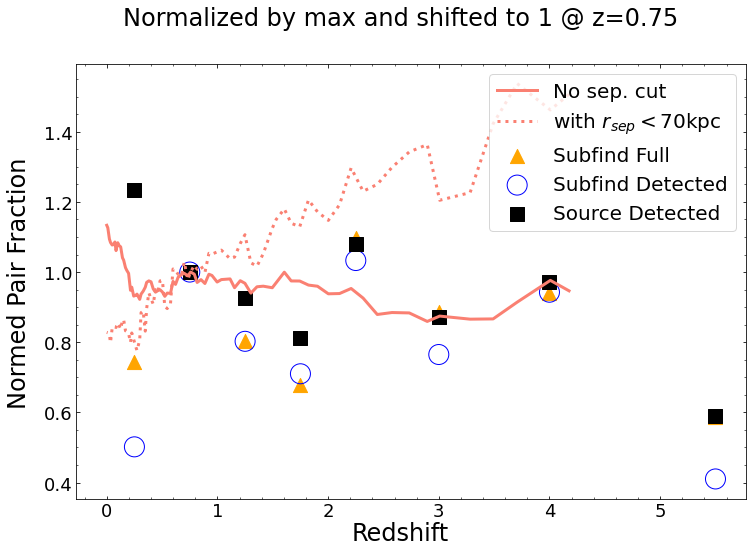

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(12,8), sharey="row", sharex=True, gridspec_kw={'width_ratios': [1], 'height_ratios':[1],'wspace': 0.02,"hspace":0.04})
al = 0.7

    # Full sample
meds = np.array(ratios['Median Major Massive'])
normmeds = meds/max(meds)
quart_low = np.array(ratios['Quartile Major Massive'])[:,0]
quart_high = np.array(ratios['Quartile Major Massive'])[:,1]

ax.plot(ratios['z'],normmeds+(1-normmeds[36]), color=palette["massive"], lw=3, label="No sep. cut")
# ax.fill_between(ratios['z'], quart_low+(1-meds[36]), quart_high+(1-meds[36]),color=palette["massive"],alpha=al)

    # <70 kpc sample
meds = np.array(sepcut['Median Major Massive'])
normmeds = meds/max(meds)
quart_low = np.array(sepcut['Quartile Major Massive'])[:,0]
quart_high = np.array(sepcut['Quartile Major Massive'])[:,1]

ax.plot(sepcut['z'],normmeds+(1-normmeds[36]), color=palette["massive"], linestyle='dotted',lw=3, label=r"with $r_{sep}<70$kpc")
# ax.fill_between(sepcut['z'], quart_low+(1-meds[36]), quart_high+(1-meds[36]),color=palette["massive"],alpha=0.3)

    # snyder
normed_subfind_full = subfind_full/max(subfind_full)
normed_subfind_detection = subfind_detection/max(subfind_detection)
normed_source_detection = source_detection/max(source_detection)

normshift_subfind_full = normed_subfind_full+(1-normed_subfind_full[1])
normshift_subfind_detection = normed_subfind_detection+(1-normed_subfind_detection[1])
normshift_source_detection = normed_source_detection+(1-normed_source_detection[1])

plt.scatter(redshift,normshift_subfind_full,s=200,marker="^",c='orange',label="Subfind Full")
plt.scatter(redshift,normshift_subfind_detection,s=400,facecolors='none', edgecolors='blue',label="Subfind Detected")
plt.scatter(redshift,normshift_source_detection,s=200,marker='s',color='black',label="Source Detected")

plt.legend(loc="upper right")
fig.suptitle("Normalized by max and shifted to 1 @ z=0.75")
fig.supxlabel("Redshift",y=0.045)
fig.supylabel("Normed Pair Fraction",x=0.045)

# if save:
# plt.savefig(f"{paths.path_plots}pairfrac_sepcut.png",bbox_inches='tight',facecolor="white")
plt.show()

### shifted by max

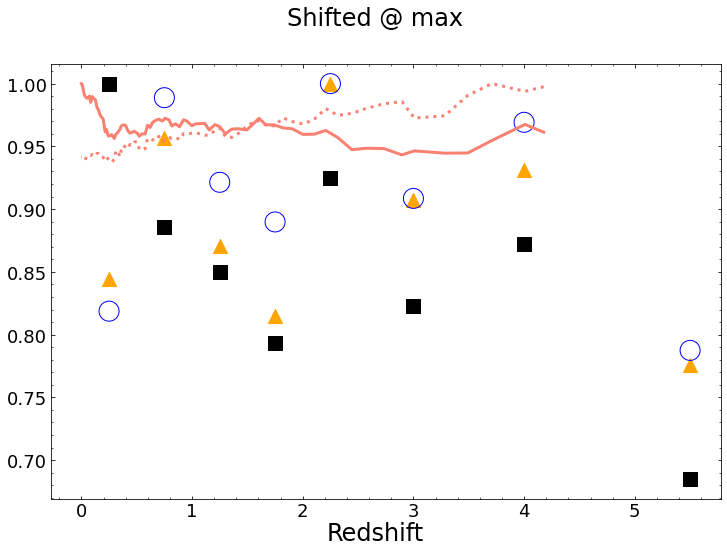

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(12,8), sharey="row", sharex=True, gridspec_kw={'width_ratios': [1], 'height_ratios':[1],'wspace': 0.02,"hspace":0.04})
al = 0.7

    # Full sample
meds = np.array(ratios['Median Major Massive'])
quart_low = np.array(ratios['Quartile Major Massive'])[:,0]
quart_high = np.array(ratios['Quartile Major Massive'])[:,1]

ax.plot(ratios['z'],meds+(1-max(meds)), color=palette["massive"], lw=3, label="Low mass")
# ax.fill_between(ratios['z'], quart_low+(1-meds[36]), quart_high+(1-meds[36]),color=palette["massive"],alpha=al)

    # <70 kpc sample
meds = np.array(sepcut['Median Major Massive'])
quart_low = np.array(sepcut['Quartile Major Massive'])[:,0]
quart_high = np.array(sepcut['Quartile Major Massive'])[:,1]

ax.plot(sepcut['z'],(meds+(1-max(meds))), color=palette["massive"], linestyle='dotted',lw=3, label="Low mass")
# ax.fill_between(sepcut['z'], quart_low+(1-meds[36]), quart_high+(1-meds[36]),color=palette["massive"],alpha=0.3)

    # snyder
shifted_subfind_full = subfind_full+(1-max(subfind_full))
shifted_subfind_detection = subfind_detection+(1-max(subfind_detection))
shifted_source_detection = source_detection+(1-max(source_detection))

plt.scatter(redshift,shifted_subfind_full,s=200,marker="^",c='orange')
plt.scatter(redshift,shifted_subfind_detection,s=400,facecolors='none', edgecolors='blue')
plt.scatter(redshift,shifted_source_detection,s=200,marker='s',color='black')

fig.suptitle("Shifted @ max")
fig.supxlabel("Redshift",y=0.045)

# if save:
# plt.savefig(f"{paths.path_plots}pairfrac_sepcut.png",bbox_inches='tight',facecolor="white")
plt.show()

### shifted at z=0.75

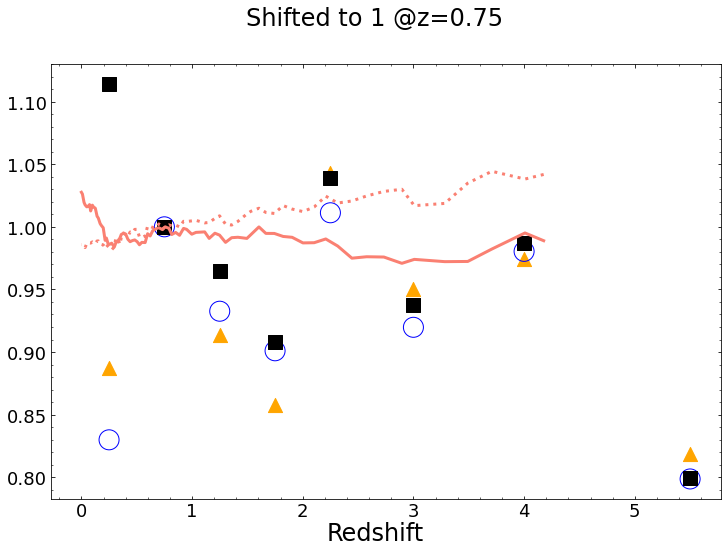

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(12,8), sharey="row", sharex=True, gridspec_kw={'width_ratios': [1], 'height_ratios':[1],'wspace': 0.02,"hspace":0.04})
al = 0.7

    # Full sample
meds = np.array(ratios['Median Major Massive'])
quart_low = np.array(ratios['Quartile Major Massive'])[:,0]
quart_high = np.array(ratios['Quartile Major Massive'])[:,1]

ax.plot(ratios['z'],meds+(1-meds[36]), color=palette["massive"], lw=3, label="Low mass")
# ax.fill_between(ratios['z'], quart_low+(1-meds[36]), quart_high+(1-meds[36]),color=palette["massive"],alpha=al)

    # <70 kpc sample
meds = np.array(sepcut['Median Major Massive'])
quart_low = np.array(sepcut['Quartile Major Massive'])[:,0]
quart_high = np.array(sepcut['Quartile Major Massive'])[:,1]

ax.plot(sepcut['z'],(meds+(1-meds[36])), color=palette["massive"], linestyle='dotted',lw=3, label="Low mass")
# ax.fill_between(sepcut['z'], quart_low+(1-meds[36]), quart_high+(1-meds[36]),color=palette["massive"],alpha=0.3)

    # snyder
shifted_subfind_full = subfind_full+(1-subfind_full[1])
shifted_subfind_detection = subfind_detection+(1-subfind_detection[1])
shifted_source_detection = source_detection+(1-source_detection[1])

plt.scatter(redshift,shifted_subfind_full,s=200,marker="^",c='orange')
plt.scatter(redshift,shifted_subfind_detection,s=400,facecolors='none', edgecolors='blue')
plt.scatter(redshift,shifted_source_detection,s=200,marker='s',color='black')

fig.suptitle("Shifted to 1 @z=0.75")
fig.supxlabel("Redshift",y=0.045)

# if save:
# plt.savefig(f"{paths.path_plots}pairfrac_sepcut.png",bbox_inches='tight',facecolor="white")
plt.show()

# Kinematic graveyard ~~

## Sep and Vel evolution

In [10]:
def plot_sepevo(reals, save=False):
    
    print(f"for {reals} realizations")
    
    f = h5py.File(f"{paths.path_plotdata}sepvel.hdf5",'r')

    sep  = {}

    # sep plot first:
    for key,val in f[f"{reals} Realizations"]["Separation"].items():
        sep[key] = np.array(val)
        
    f.close()
        
    fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey=False, sharex=True, 
                           gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,0.3],'wspace': 0.1,"hspace":0.04})

    ax_d = ax[0][0]
    ax_m = ax[0][1]
    ax_ddiff = ax[1][0]
    ax_mdiff = ax[1][1]

    ax_d.set(title="Low mass pairs", ylabel=r"$\rm r_{sep}$ [kpc]")
    ax_m.set(title="High mass pairs")
    ax_ddiff.set(ylabel="maj - min")

    al = 0.7

    #############
    # dwarf #
    #############
    ax_d.plot(sep['z'],sep['Median Major Dwarf'], color=palette["dwarf"], lw=3, label="Major")
    ax_d.plot(sep['z'],sep['Median Minor Dwarf'], color=palette["dwarf"], lw=3, linestyle="dotted", label="Minor")

    ax_d.fill_between(sep['z'], np.array(sep['Quartile Major Dwarf'])[:,0], np.array(sep['Quartile Major Dwarf'])[:,1],color=palette["dwarf"], alpha=alphas["maj"])
    ax_d.fill_between(sep['z'], np.array(sep['Quartile Minor Dwarf'])[:,0], np.array(sep['Quartile Minor Dwarf'])[:,1],color=palette["dwarf"], alpha=alphas["min"])


    #############
    # massive #
    #############
    ax_m.plot(sep['z'],sep['Median Major Massive'], color=palette["massive"], lw=3, label="Major")
    ax_m.plot(sep['z'],sep['Median Minor Massive'], color=palette["massive"], lw=3, linestyle="dotted", label="Minor")

    ax_m.fill_between(sep['z'], np.array(sep['Quartile Major Massive'])[:,0], np.array(sep['Quartile Major Massive'])[:,1],color=palette["massive"],alpha=alphas["maj"])
    ax_m.fill_between(sep['z'], np.array(sep['Quartile Minor Massive'])[:,0], np.array(sep['Quartile Minor Massive'])[:,1],color=palette["massive"],alpha=alphas["min"])


    ####################
    # dwarf difference #
    ####################
    # axmaj_d.plot(tngd_d['z'],tngd_d['Major Median'], color=palette["Illustris dark"], lw=3)
    ax_ddiff.plot(sep['z'],sep['Median Dwarf Difference'], color=palette["dwarf"], lw=3, label="Difference")
    ax_ddiff.fill_between(sep['z'], np.array(sep['Quartile Dwarf Difference'])[:,0], np.array(sep['Quartile Dwarf Difference'])[:,1],color=palette["dwarf"], alpha=alphas["maj"])


    ######################
    # massive difference #
    ######################
    ax_mdiff.plot(sep['z'],sep['Median Massive Difference'], color=palette["massive"], lw=3, label="Difference")
    ax_mdiff.fill_between(sep['z'], np.array(sep['Quartile Massive Difference'])[:,0], np.array(sep['Quartile Massive Difference'])[:,1],color=palette["massive"],alpha=alphas["maj"])

    ax_ddiff.axhline(0,color="black",lw=1,alpha=0.3)
    ax_mdiff.axhline(0,color="black",lw=1,alpha=0.3)

    #############
    #############
    for ax in [ax_d,ax_m]:
        leg = ax.legend(loc='upper right',fontsize=16)

    #     for lh in leg.legendHandles: 
    #         lh.set_alpha(1)

    fig.supxlabel("Redshift",y=0.045)  
    
    if save:
        plt.savefig(f"{paths.path_plots}sep_{reals}.png",bbox_inches='tight',facecolor="white")
    plt.show()

    
def plot_velevo(reals, save=False):
    
    print(f"for {reals} realizations")
    
    f = h5py.File(f"{paths.path_plotdata}sepvel.hdf5",'r')

    vels  = {}

    # sep plot first:
    for key,val in f[f"{reals} Realizations"]["Velocity"].items():
        vels[key] = np.array(val)   
        
    f.close()
        
    ## plot of median counts and differences for illustris and tng
    fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey=False, sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,0.3],'wspace': 0.12,"hspace":0.04})

    ax_d = ax[0][0]
    ax_m = ax[0][1]
    ax_ddiff = ax[1][0]
    ax_mdiff = ax[1][1]

    ax_d.set(title="Low mass pairs", ylabel=r"$\rm v_{rel}$ [km/s]")
    ax_m.set(title="High mass pairs")
    ax_ddiff.set(ylabel="maj - min")

    #############
    # dwarf #
    #############
    ax_d.plot(vels['z'],vels['Median Major Dwarf'], color=palette["dwarf"], lw=3, label="Major")
    ax_d.plot(vels['z'],vels['Median Minor Dwarf'], color=palette["dwarf"], lw=3,linestyle="dotted", label="Minor")

    ax_d.fill_between(vels['z'], np.array(vels['Quartile Major Dwarf'])[:,0], np.array(vels['Quartile Major Dwarf'])[:,1], color=palette["dwarf"], alpha=alphas["maj"])
    ax_d.fill_between(vels['z'], np.array(vels['Quartile Minor Dwarf'])[:,0], np.array(vels['Quartile Minor Dwarf'])[:,1], color=palette["dwarf"], alpha=alphas["min"])

    #############
    # massive #
    #############
    ax_m.plot(vels['z'],vels['Median Major Massive'], color=palette["massive"], lw=3, label="Major")
    ax_m.plot(vels['z'],vels['Median Minor Massive'], color=palette["massive"], lw=3, linestyle="dotted", label="Minor")

    ax_m.fill_between(vels['z'], np.array(vels['Quartile Major Massive'])[:,0], np.array(vels['Quartile Major Massive'])[:,1], color=palette["massive"], alpha=alphas["maj"])
    ax_m.fill_between(vels['z'], np.array(vels['Quartile Minor Massive'])[:,0], np.array(vels['Quartile Minor Massive'])[:,1], color=palette["massive"], alpha=alphas["min"])

    ####################
    # dwarf difference #
    ####################
    # axmaj_d.plot(tngd_d['z'],tngd_d['Major Median'], color=palette["Illustris dark"], lw=3)
    ax_ddiff.plot(vels['z'],vels['Median Dwarf Difference'], color=palette["dwarf"], lw=3, label="Difference")
    ax_ddiff.fill_between(vels['z'], np.array(vels['Quartile Dwarf Difference'])[:,0], np.array(vels['Quartile Dwarf Difference'])[:,1],color=palette["dwarf"], alpha=alphas["maj"])

    ######################
    # massive difference #
    ######################
    ax_mdiff.plot(vels['z'],vels['Median Massive Difference'], color=palette["massive"], lw=3, label="Difference")
    ax_mdiff.fill_between(vels['z'], np.array(vels['Quartile Massive Difference'])[:,0], np.array(vels['Quartile Massive Difference'])[:,1],color=palette["massive"],alpha=alphas["maj"])

    ax_ddiff.axhline(0,color="black",lw=1,alpha=0.3)
    ax_mdiff.axhline(0,color="black",lw=1,alpha=0.3)

    #############
    #############
    for axx in [ax_d,ax_m]:
        leg = axx.legend(loc='lower right',fontsize=16)

    fig.supxlabel("Redshift",y=0.05)
    if save:
        plt.savefig(f"{paths.path_plots}vel_{reals}.png",bbox_inches='tight',facecolor="white")
    plt.show()


for 1000 realizations


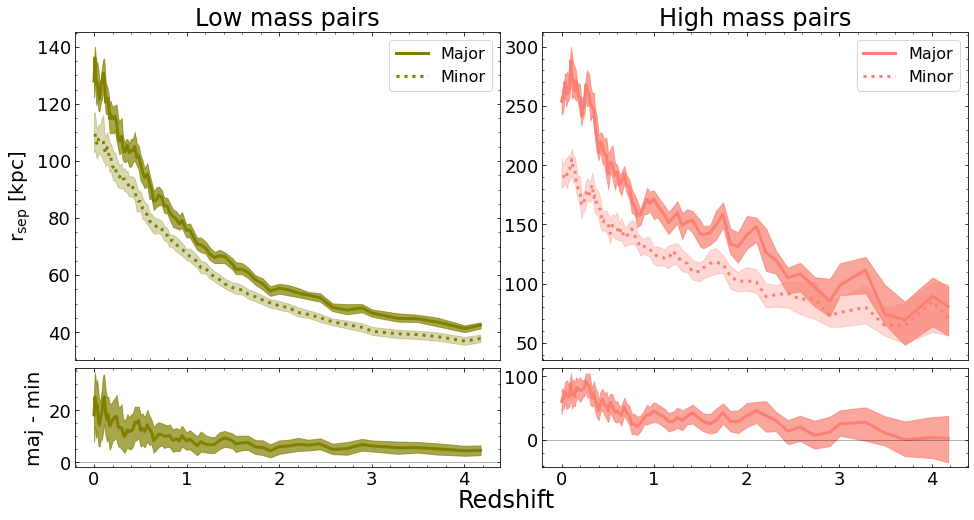

In [11]:
# plot_sepevo(10, False)
# plot_sepevo(100, False)
plot_sepevo(1000, True)

for 1000 realizations


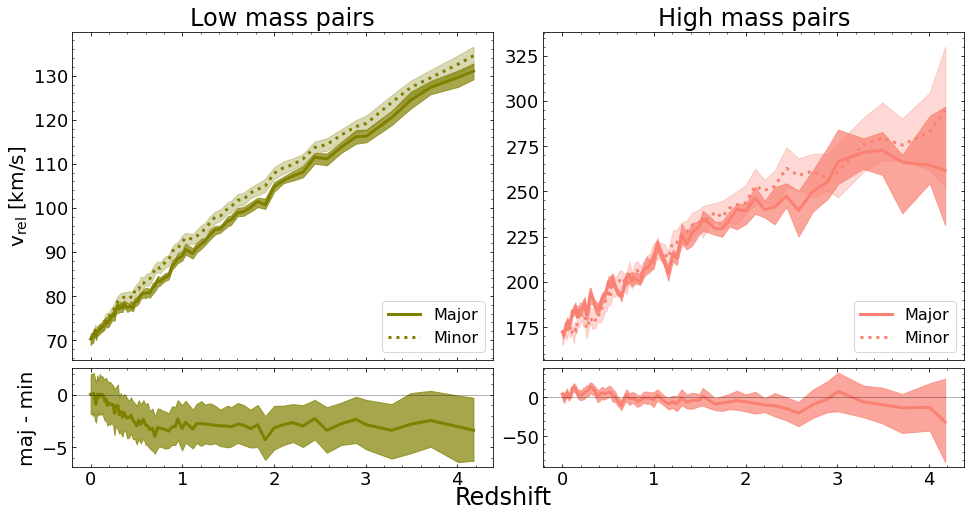

In [12]:
# plot_velevo(10, False)
# plot_velevo(100, False)
plot_velevo(1000, True)

## Scaled Sep and Vel Evolution

In [278]:
def plot_ssepevo(reals, save=False):
    
    print(f"for {reals} realizations")
    
    f = h5py.File(f"{paths.path_plotdata}sepvel.hdf5",'r')

    sseps  = {}

    # sep plot first:
    for key,val in f[f"{reals} Realizations"]["Scaled Separation"].items():
        sseps[key] = np.array(val)
        
    f.close()    
        
    ## plot of median counts and differences for illustris and tng
    fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey="row", sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,0.3],'wspace': 0.02,"hspace":0.04})

    ax_d = ax[0][0]
    ax_m = ax[0][1]
    ax_ddiff = ax[1][0]
    ax_mdiff = ax[1][1]

    ax_d.set(title="Major pairs", ylabel="Median Scaled Separation")
    ax_m.set(title="Minor pairs")
    ax_ddiff.set(ylabel=r"M-D")

    #############
    # dwarf #
    #############
    ax_d.plot(sseps['z'],sseps['Median Major Dwarf'], color=palette["dwarf"], lw=3, label="Dwarf")
    ax_d.plot(sseps['z'],sseps['Median Major Massive'], color=palette["massive"], lw=3, label="Massive")

    ax_d.fill_between(sseps['z'], np.array(sseps['Quartile Major Dwarf'])[:,0], np.array(sseps['Quartile Major Dwarf'])[:,1],color=palette["dwarf"],alpha=alphas["maj"])
    ax_d.fill_between(sseps['z'], np.array(sseps['Quartile Major Massive'])[:,0], np.array(sseps['Quartile Major Massive'])[:,1],color=palette["massive"],alpha=alphas["maj"])

    #############
    # massive #
    #############
    ax_m.plot(sseps['z'],sseps['Median Minor Dwarf'], color=palette["dwarf"], lw=3, linestyle="dotted", label="Dwarf")
    ax_m.plot(sseps['z'],sseps['Median Minor Massive'], color=palette["massive"], lw=3, linestyle="dotted", label="Massive")

    ax_m.fill_between(sseps['z'], np.array(sseps['Quartile Minor Dwarf'])[:,0], np.array(sseps['Quartile Minor Dwarf'])[:,1],color=palette["dwarf"],alpha=alphas["min"])
    ax_m.fill_between(sseps['z'], np.array(sseps['Quartile Minor Massive'])[:,0], np.array(sseps['Quartile Minor Massive'])[:,1],color=palette["massive"],alpha=alphas["min"])

    ##############
    # major diff #
    ##############
    ax_ddiff.plot(sseps['z'],sseps['Median Major Difference'], color=palette["difference"], lw=3, label="Difference")
    ax_ddiff.fill_between(sseps['z'], np.array(sseps['Quartile Major Difference'])[:,0], np.array(sseps['Quartile Major Difference'])[:,1],color=palette["difference"],alpha=alphas["maj"])

    ##############
    # minor diff #
    ##############
    ax_mdiff.plot(sseps['z'],sseps['Median Minor Difference'], color=palette["difference"], lw=3, linestyle="dotted", label="Difference")
    ax_mdiff.fill_between(sseps['z'], np.array(sseps['Quartile Minor Difference'])[:,0], np.array(sseps['Quartile Minor Difference'])[:,1],color=palette["difference"],alpha=alphas["min"])

    ax_ddiff.axhline(0,color="black",lw=1,alpha=0.3)
    ax_mdiff.axhline(0,color="black",lw=1,alpha=0.3)

    #############
    #############
    for axx in [ax_d,ax_m,]:
        leg = axx.legend(loc='upper left',fontsize=16)

#     for axx in [ax_ddiff,ax_mdiff]:
#         leg = axx.legend(loc='upper right',fontsize=16)

    fig.supxlabel("Redshift",y=0.045)
    if save:
        plt.savefig(f"{paths.path_plots}scaledsep_{reals}.png",bbox_inches='tight',facecolor="white")
    plt.show()
    
    
def plot_svelevo(reals, save=False):
    
    print(f"for {reals} realizations")
    
    f = h5py.File(f"{paths.path_plotdata}sepvel.hdf5",'r')

    svels  = {}

    # sep plot first:
    for key,val in f[f"{reals} Realizations"]["Scaled Velocity"].items():
        svels[key] = np.array(val)  
        
    f.close()
        
    ## plot of median counts and differences for illustris and tng
    fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey="row", sharex=True, 
                           gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,0.3],'wspace': 0.02,"hspace":0.04})

    ax_d = ax[0][0]
    ax_m = ax[0][1]
    ax_ddiff = ax[1][0]
    ax_mdiff = ax[1][1]

    ax_d.set(title="Major pairs", ylabel="Median Scaled Velocity")
    ax_m.set(title="Minor pairs")
    ax_ddiff.set(ylabel=r"M-D")

    #############
    # dwarf #
    #############
    ax_d.plot(svels['z'],svels['Median Major Dwarf'], color=palette["dwarf"], lw=3, label="Dwarf")
    ax_d.plot(svels['z'],svels['Median Major Massive'], color=palette["massive"], lw=3, label="Massive")

    ax_d.fill_between(svels['z'], np.array(svels['Quartile Major Dwarf'])[:,0], np.array(svels['Quartile Major Dwarf'])[:,1],color=palette["dwarf"],alpha=alphas["maj"])
    ax_d.fill_between(svels['z'], np.array(svels['Quartile Major Massive'])[:,0], np.array(svels['Quartile Major Massive'])[:,1],color=palette["massive"],alpha=alphas["maj"])

    #############
    # massive #
    #############
    ax_m.plot(svels['z'],svels['Median Minor Dwarf'], color=palette["dwarf"], lw=3, linestyle="dotted", label="Dwarf")
    ax_m.plot(svels['z'],svels['Median Minor Massive'], color=palette["massive"], lw=3, linestyle="dotted", label="Massive")

    ax_m.fill_between(svels['z'], np.array(svels['Quartile Minor Dwarf'])[:,0], np.array(svels['Quartile Minor Dwarf'])[:,1],color=palette["dwarf"],alpha=alphas["min"])
    ax_m.fill_between(svels['z'], np.array(svels['Quartile Minor Massive'])[:,0], np.array(svels['Quartile Minor Massive'])[:,1],color=palette["massive"],alpha=alphas["min"])

    ##############
    # major diff #
    ##############
    ax_ddiff.plot(svels['z'],svels['Median Major Difference'], color=palette["difference"], lw=3, label="Difference")
    ax_ddiff.fill_between(svels['z'], np.array(svels['Quartile Major Difference'])[:,0], np.array(svels['Quartile Major Difference'])[:,1],color=palette["difference"],alpha=alphas["maj"])

    ##############
    # minor diff #
    ##############
    ax_mdiff.plot(svels['z'],svels['Median Minor Difference'], color=palette["difference"], lw=3, linestyle="dotted", label="Difference")
    ax_mdiff.fill_between(svels['z'], np.array(svels['Quartile Minor Difference'])[:,0], np.array(svels['Quartile Minor Difference'])[:,1],color=palette["difference"],alpha=alphas["min"])


    ax_ddiff.axhline(0,color="black",lw=1,alpha=0.3)
    ax_mdiff.axhline(0,color="black",lw=1,alpha=0.3)

    #############
    #############
    for ax in [ax_d,ax_m]:
        leg = ax.legend(loc='upper right',fontsize=16)

#     for ax in [ax_ddiff,ax_mdiff]:
#         leg = ax.legend(loc='lower right',fontsize=16)

    fig.supxlabel("Redshift",y=0.045)
    if save:
        plt.savefig(f"{paths.path_plots}scaledvel_{reals}.png",bbox_inches='tight',facecolor="white")
    plt.show()


for 1000 realizations


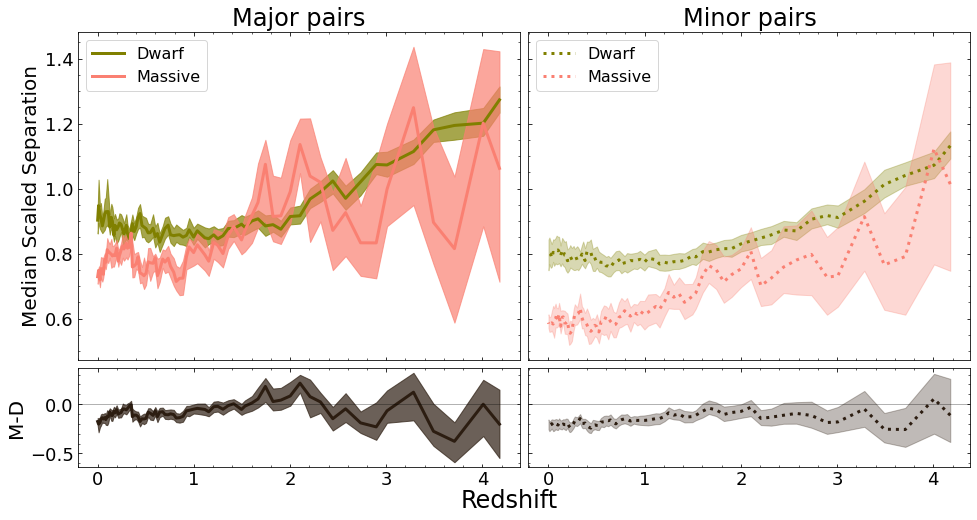

for 1000 realizations


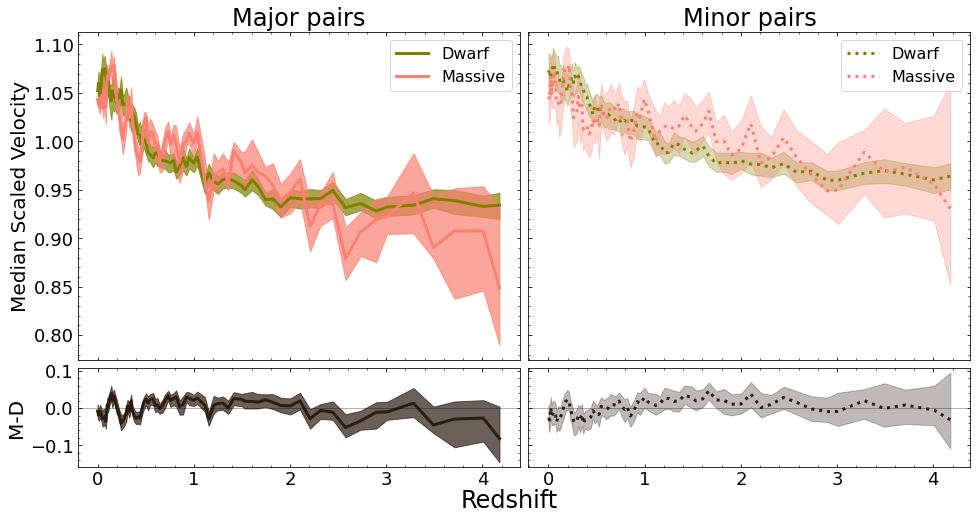

In [279]:
# plot_ssepevo(10,False)
# plot_ssepevo(100,False)
plot_ssepevo(1000,True)
# plot_svelevo(10,False)
# plot_svelevo(100,False)
plot_svelevo(1000,True)

In [10]:
def plot_scaledcomboevo(reals, save=False):
    
    print(f"for {reals} realizations")
    
    f = h5py.File(f"{paths.path_plotdata}sepvel.hdf5",'r')

    sseps = {}
    svels = {}

    # sep plot first:
    for key,val in f[f"{reals} Realizations"]["Scaled Separation"].items():
        sseps[key] = np.array(val)
        
    for key,val in f[f"{reals} Realizations"]["Scaled Velocity"].items():
        svels[key] = np.array(val)      
        
    f.close()    
        
    ## plot of median counts and differences for illustris and tng
    fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey=False, sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,0.3],'wspace': 0.18,"hspace":0.04})

    ax_d = ax[0][0]
    ax_m = ax[0][1]
    ax_ddiff = ax[1][0]
    ax_mdiff = ax[1][1]

    ax_d.set(title="Scaled Separation",ylabel=r"$\rm r_{sep}/r_{vir}$")
    ax_m.set(title="Scaled Velocity",ylabel=r"$\rm v_{rel}/v_{vir}$")
    ax_ddiff.set(ylabel=r"M-D")

    ax_d.axhline(1,color="black",lw=1,alpha=0.2)
    ax_m.axhline(1,color="black",lw=1,alpha=0.2)
    
    #############
    # major seps #
    #############
    ax_d.plot(sseps['z'],sseps['Median Major Dwarf'], color=palette["dwarf"], lw=3, label="Dwarf")
    ax_d.plot(sseps['z'],sseps['Median Major Massive'], color=palette["massive"], lw=3, label="Massive")

    ax_d.fill_between(sseps['z'], np.array(sseps['Quartile Major Dwarf'])[:,0], np.array(sseps['Quartile Major Dwarf'])[:,1],color=palette["dwarf"],alpha=alphas["maj"])
    ax_d.fill_between(sseps['z'], np.array(sseps['Quartile Major Massive'])[:,0], np.array(sseps['Quartile Major Massive'])[:,1],color=palette["massive"],alpha=alphas["maj"])

    #############
    # major vels #
    #############
    ax_m.plot(svels['z'],svels['Median Major Dwarf'], color=palette["dwarf"], lw=3, label="Dwarf")
    ax_m.plot(svels['z'],svels['Median Major Massive'], color=palette["massive"], lw=3, label="Massive")

    ax_m.fill_between(svels['z'], np.array(svels['Quartile Major Dwarf'])[:,0], np.array(svels['Quartile Major Dwarf'])[:,1],color=palette["dwarf"],alpha=alphas["maj"])
    ax_m.fill_between(svels['z'], np.array(svels['Quartile Major Massive'])[:,0], np.array(svels['Quartile Major Massive'])[:,1],color=palette["massive"],alpha=alphas["maj"])

    ##############
    # major diff #
    ##############
    ax_ddiff.plot(sseps['z'],sseps['Median Major Difference'], color=palette["difference"], lw=3, label="Difference")
    ax_ddiff.fill_between(sseps['z'], np.array(sseps['Quartile Major Difference'])[:,0], np.array(sseps['Quartile Major Difference'])[:,1],color=palette["difference"],alpha=alphas["maj"])

    ##############
    # minor diff #
    ##############
    ax_mdiff.plot(svels['z'],svels['Median Major Difference'], color=palette["difference"], lw=3, label="Difference")
    ax_mdiff.fill_between(svels['z'], np.array(svels['Quartile Major Difference'])[:,0], np.array(svels['Quartile Major Difference'])[:,1],color=palette["difference"],alpha=alphas["maj"])

    ax_ddiff.axhline(0,color="black",lw=1,alpha=0.3)
    ax_mdiff.axhline(0,color="black",lw=1,alpha=0.3)

    #############
    #############
    ax_d.legend(loc='upper left',fontsize=16)
    ax_m.legend(loc='upper right',fontsize=16)
    fig.supxlabel("Redshift",y=0.045)
    if save:
        plt.savefig(f"{paths.path_plots}scaledcombo_{reals}.png",bbox_inches='tight',facecolor="white")
    plt.show()
    


for 1000 realizations


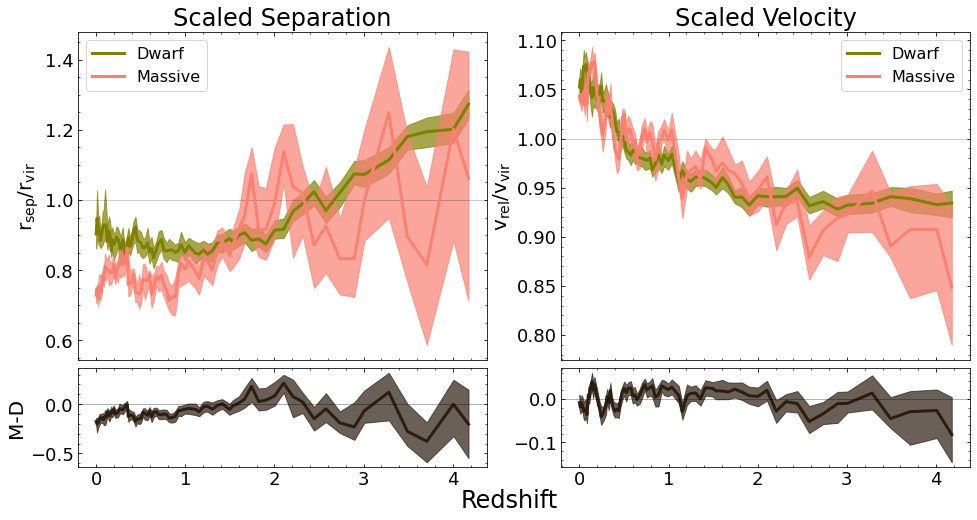

In [12]:
# plot_scaledcomboevo(10)
# plot_scaledcomboevo(100)
plot_scaledcomboevo(1000,save=True)

## Distributions

### Unscaled

In [246]:
def plot_sepdist(reals, save=False):
    
    mediansepdata = h5py.File(f"{paths.path_plotdata}sepvel.hdf5",'r')
    medsep  = {}

    # sep plot first:
    for key,val in mediansepdata[f"{reals} Realizations"]["Separation"].items():
        medsep[key] = np.array(val)
        
    mediansepdata.close()
    
    f = h5py.File(f"{paths.path_plotdata}sepveldist.hdf5",'r')
    distdata = f[f"{reals} Realizations"]

    print(f"for {reals} realizations")
    
    fig, ax = plt.subplots(2,5,figsize=(16,8),sharey=True,sharex=False)
    plt.subplots_adjust(wspace=0,hspace=0.1)

    for i in range(5):
        locc = np.where( np.min( np.abs(medsep['z'] - i)  ) == np.abs(medsep['z'] - i))
        
        dwarf = {}
        massive = {}
        
        for key,val in distdata[f'z={i}']["dwarf"]["Separation"].items():
            dwarf[key] = np.array(val)
        for key,val in distdata[f'z={i}']["massive"]["Separation"].items():
            massive[key] = np.array(val)

        bins_d = np.linspace(0,500,20)
        bins_h = np.linspace(0,1200,20)

        ax[0][i].set_title(f"z = {i}")

        # Illustris Major pairs
        col = palette["difference"]
        ala = 1

        ax[0][i].hist(dwarf['major'],bins=bins_d,weights=np.ones(len(dwarf['major']))/len(dwarf['major']),histtype="step", color=palette['dwarf'], lw=4, label='Major')
        ax[0][i].hist(dwarf['minor'],bins=bins_d,weights=np.ones(len(dwarf['minor']))/len(dwarf['minor']),histtype="step", color=palette['dwarf'], lw=4, alpha=0.5, linestyle="dotted", label="Minor") # to put minor behind

        ax[1][i].hist(massive['major'],bins=bins_h,weights=np.ones(len(massive['major']))/len(massive['major']),histtype="step", color=palette['massive'], lw=4, label='Major')
        ax[1][i].hist(massive['minor'],bins=bins_h,weights=np.ones(len(massive['minor']))/len(massive['minor']),histtype="step", color=palette['massive'], lw=4, alpha=0.5, linestyle="dotted", label="Minor") # to put minor behind

        ax[0][i].axvline( medsep["Median Major Dwarf"][locc] ,color=col, alpha=ala, lw=2)
        ax[0][i].axvline( medsep["Median Minor Dwarf"][locc] ,color=col, alpha=0.7, lw=2, linestyle="dotted")
        ax[1][i].axvline( medsep["Median Major Massive"][locc] ,color=col, alpha=ala, lw=2)
        ax[1][i].axvline( medsep["Median Minor Massive"][locc] ,color=col, alpha=0.7, lw=2, linestyle="dotted")

    for xx in [ax[0][4],ax[1][4]]:
        leg = xx.legend(loc='upper right',fontsize=16)

    fig.supxlabel(r"Separation $\rm r_{sep}$ (kpc)",y=0.03)
    ax[0][0].set_ylabel("Dwarf",color=palette['dwarf'])
    ax[1][0].set_ylabel("Massive",color=palette['massive'])
    fig.supylabel(r"P($\rm r_{sep}$)",x=0.040)
    if save:
        plt.savefig(f"{paths.path_plots}sepdist_{reals}.png",bbox_inches='tight',facecolor="white")
    plt.show()
    
    f.close()

for 1000 realizations


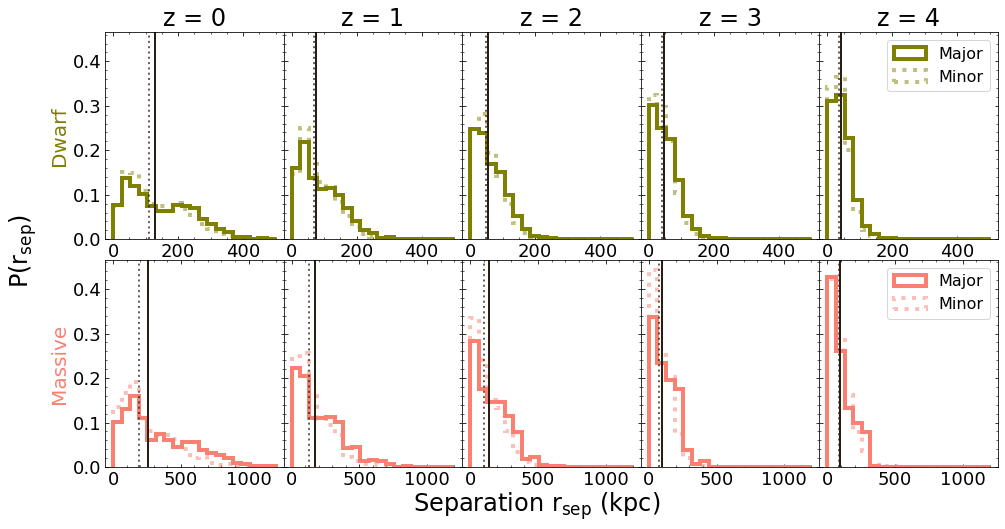

In [247]:
# plot_sepdist(10, save=False)
# plot_sepdist(100, save=False)
plot_sepdist(1000, save=True)

In [244]:
def plot_veldist(reals, save=False):
    
    mediansepdata = h5py.File(f"{paths.path_plotdata}sepvel.hdf5",'r')
    medsep  = {}

    # sep plot first:
    for key,val in mediansepdata[f"{reals} Realizations"]["Velocity"].items():
        medsep[key] = np.array(val)
        
    mediansepdata.close()
    
    f = h5py.File(f"{paths.path_plotdata}sepveldist.hdf5",'r')
    distdata = f[f"{reals} Realizations"]

    print(f"for {reals} realizations")
    
    fig, ax = plt.subplots(2,5,figsize=(16,8),sharey=True,sharex=True)
    plt.subplots_adjust(wspace=0,hspace=0.04)

    for i in range(5):
        locc = np.where( np.min( np.abs(medsep['z'] - i)  ) == np.abs(medsep['z'] - i))
        
        dwarf = {}
        massive = {}
        
        for key,val in distdata[f'z={i}']["dwarf"]["Velocity"].items():
            dwarf[key] = np.array(val)
        for key,val in distdata[f'z={i}']["massive"]["Velocity"].items():
            massive[key] = np.array(val)

        bins_d = np.linspace(0,700,20)
        bins_h = np.linspace(0,700,20)

        ax[0][i].set_title(f"z = {i}")

        # Illustris Major pairs
        col = palette["difference"]
        ala = 1

        ax[0][i].hist(dwarf['major'],bins=bins_d,weights=np.ones(len(dwarf['major']))/len(dwarf['major']),histtype="step", color=palette['dwarf'], lw=4, label='Major')
        ax[0][i].hist(dwarf['minor'],bins=bins_d,weights=np.ones(len(dwarf['minor']))/len(dwarf['minor']),histtype="step", color=palette['dwarf'], lw=4, alpha=0.5, linestyle="dotted", label="Minor") # to put minor behind

        ax[1][i].hist(massive['major'],bins=bins_h,weights=np.ones(len(massive['major']))/len(massive['major']),histtype="step", color=palette['massive'], lw=4, label='Major')
        ax[1][i].hist(massive['minor'],bins=bins_h,weights=np.ones(len(massive['minor']))/len(massive['minor']),histtype="step", color=palette['massive'], lw=4, alpha=0.5, linestyle="dotted", label="Minor") # to put minor behind

        ax[0][i].axvline( medsep["Median Major Dwarf"][locc] ,color=col, alpha=ala, lw=2)
        ax[0][i].axvline( medsep["Median Minor Dwarf"][locc] ,color=col, alpha=0.7, lw=2, linestyle="dotted")
        ax[1][i].axvline( medsep["Median Major Massive"][locc] ,color=col, alpha=ala, lw=2)
        ax[1][i].axvline( medsep["Median Minor Massive"][locc] ,color=col, alpha=0.7, lw=2, linestyle="dotted")

    for xx in [ax[0][4],ax[1][4]]:
        leg = xx.legend(loc='upper right',fontsize=16)

    fig.supxlabel(r"Relative velocity $\rm v_{rel}$ (km/s)",y=0.03)
    ax[0][0].set_ylabel("Dwarf",color=palette['dwarf'])
    ax[1][0].set_ylabel("Massive",color=palette['massive'])
    fig.supylabel(r"P$(\rm v_{rel})$",x=0.040)
    if save:
        plt.savefig(f"{paths.path_plots}veldist_{reals}.png",bbox_inches='tight',facecolor="white")
    plt.show()
    
    f.close()

for 1000 realizations


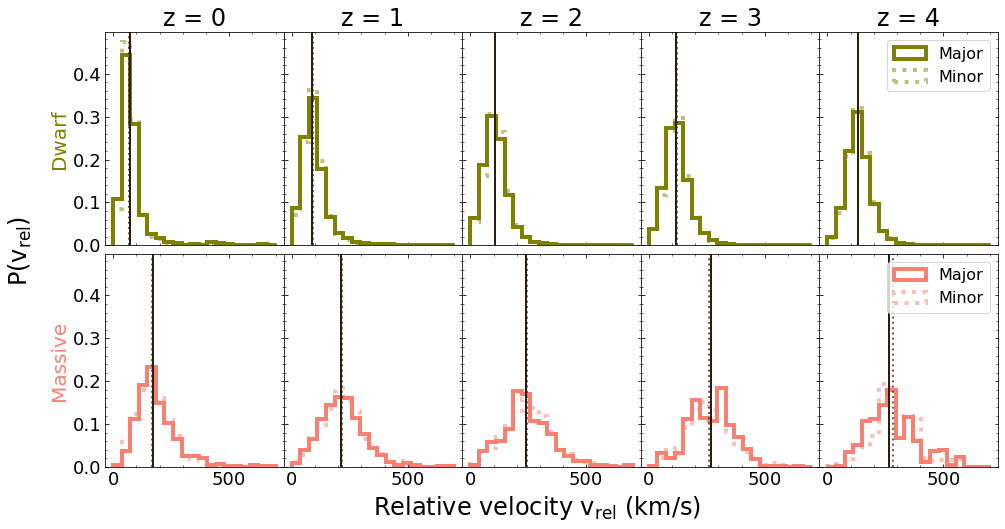

In [245]:
# plot_veldist(10,False)
# plot_veldist(100,False)
plot_veldist(1000,True)

### Scaled

In [229]:
def plot_ssepdist(reals, save=False):
    
    mediansepdata = h5py.File(f"{paths.path_plotdata}sepvel.hdf5",'r')
    meddat  = {}

    # sep plot first:
    for key,val in mediansepdata[f"{reals} Realizations"]["Scaled Separation"].items():
        meddat[key] = np.array(val)
        
    mediansepdata.close()
    
    f = h5py.File(f"{paths.path_plotdata}sepveldist.hdf5",'r')
    distdata = f[f"{reals} Realizations"]

    print(f"for {reals} realizations")
    
    fig, ax = plt.subplots(2,5,figsize=(16,8),sharey=True,sharex=True)
    plt.subplots_adjust(wspace=0,hspace=0.04)

    for i in range(5):
        locc = np.where( np.min( np.abs(meddat['z'] - i)  ) == np.abs(meddat['z'] - i))
        
        dwarf = {}
        massive = {}
        
        for key,val in distdata[f'z={i}']["dwarf"]["Scaled Separation"].items():
            dwarf[key] = np.array(val)
        for key,val in distdata[f'z={i}']["massive"]["Scaled Separation"].items():
            massive[key] = np.array(val)

        bins_d = np.linspace(0,5.5,20)
        bins_h = np.linspace(0,5.5,20)

        ax[0][i].set_title(f"z = {i}")

        # Illustris Major pairs
        ax[0][i].hist(dwarf['major'],bins=bins_d,weights=np.ones(len(dwarf['major']))/len(dwarf['major']),histtype="step", color=palette['dwarf'], lw=4, label='Major')
        ax[0][i].hist(dwarf['minor'],bins=bins_d,weights=np.ones(len(dwarf['minor']))/len(dwarf['minor']),histtype="step", color=palette['dwarf'], lw=4, alpha=0.5, linestyle="dotted", label="Minor") # to put minor behind

        ax[1][i].hist(massive['major'],bins=bins_h,weights=np.ones(len(massive['major']))/len(massive['major']),histtype="step", color=palette['massive'], lw=4, label='Major')
        ax[1][i].hist(massive['minor'],bins=bins_h,weights=np.ones(len(massive['minor']))/len(massive['minor']),histtype="step", color=palette['massive'], lw=4, alpha=0.5, linestyle="dotted", label="Minor") # to put minor behind

        ax[0][i].axvline( meddat["Median Major Dwarf"][locc] ,color=palette["difference"], lw=2)
        ax[0][i].axvline( meddat["Median Minor Dwarf"][locc] ,color=palette["difference"], linestyle="dotted", alpha=0.7, lw=2)
        ax[1][i].axvline( meddat["Median Major Massive"][locc] ,color=palette["difference"], lw=2)
        ax[1][i].axvline( meddat["Median Minor Massive"][locc] ,color=palette["difference"], linestyle="dotted", alpha=0.7, lw=2)
    
    for i in ax:
        for j in i:
            j.set_xticks((0,2,4), labels=("0","2","4"))

    for xx in [ax[0][4],ax[1][4]]:
        leg = xx.legend(loc='upper right',fontsize=16)

    fig.supxlabel(r"Scaled Separation ($\rm r_{sep}/r_{vir}$)",y=0.03)
    ax[0][0].set_ylabel("Dwarf",color=palette['dwarf'])
    ax[1][0].set_ylabel("Massive",color=palette['massive'])
    fig.supylabel(r"P($\rm r_{sep}/r_{vir}$)",x=0.040)
    if save:
        plt.savefig(f"{paths.path_plots}scaledsepdist_{reals}.png",bbox_inches='tight',facecolor="white")
    plt.show()
    
    f.close()

for 1000 realizations


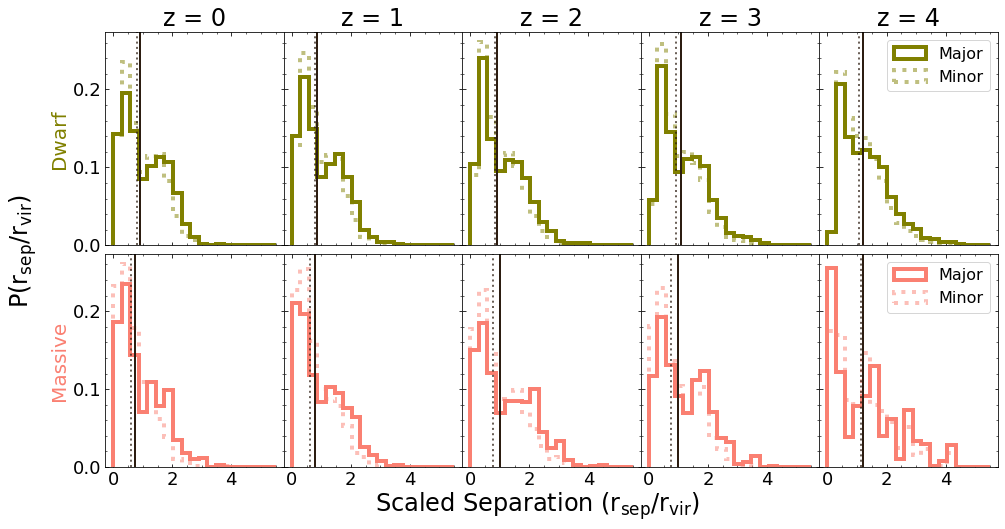

In [230]:
# plot_ssepdist(10,False)
# plot_ssepdist(100,False)
plot_ssepdist(1000,True)

In [242]:
def plot_sveldist(reals, save=False):
    
    mediansepdata = h5py.File(f"{paths.path_plotdata}sepvel.hdf5",'r')
    meddat  = {}

    # sep plot first:
    for key,val in mediansepdata[f"{reals} Realizations"]["Scaled Velocity"].items():
        meddat[key] = np.array(val)
        
    mediansepdata.close()
    
    f = h5py.File(f"{paths.path_plotdata}sepveldist.hdf5",'r')
    distdata = f[f"{reals} Realizations"]

    print(f"for {reals} realizations")
    
    fig, ax = plt.subplots(2,5,figsize=(16,8),sharey=True,sharex=True)
    plt.subplots_adjust(wspace=0,hspace=0.04)

    for i in range(5):
        locc = np.where( np.min( np.abs(meddat['z'] - i)  ) == np.abs(meddat['z'] - i))
        
        dwarf = {}
        massive = {}
        
        for key,val in distdata[f'z={i}']["dwarf"]["Scaled Velocity"].items():
            dwarf[key] = np.array(val)
        for key,val in distdata[f'z={i}']["massive"]["Scaled Velocity"].items():
            massive[key] = np.array(val)

        bins_d = np.linspace(0,3.5,20)
        bins_h = np.linspace(0,3.5,20)

        ax[0][i].set_title(f"z = {i}")
        
        # Illustris Major pairs
        ax[0][i].hist(dwarf['major'],bins=bins_d,weights=np.ones(len(dwarf['major']))/len(dwarf['major']),histtype="step", color=palette['dwarf'], lw=4, label='Major')
        ax[0][i].hist(dwarf['minor'],bins=bins_d,weights=np.ones(len(dwarf['minor']))/len(dwarf['minor']),histtype="step", color=palette['dwarf'], lw=4, alpha=0.5, linestyle="dotted", label="Minor") # to put minor behind

        ax[1][i].hist(massive['major'],bins=bins_h,weights=np.ones(len(massive['major']))/len(massive['major']),histtype="step", color=palette['massive'], lw=4, label='Major')
        ax[1][i].hist(massive['minor'],bins=bins_h,weights=np.ones(len(massive['minor']))/len(massive['minor']),histtype="step", color=palette['massive'], lw=4, alpha=0.5, linestyle="dotted", label="Minor") # to put minor behind

        ax[0][i].axvline( meddat["Median Major Dwarf"][locc] ,color=palette["difference"], lw=2)
        ax[0][i].axvline( meddat["Median Minor Dwarf"][locc] ,color=palette["difference"], linestyle="dotted", alpha=0.7, lw=2)
        ax[1][i].axvline( meddat["Median Major Massive"][locc] ,color=palette["difference"], lw=2)
        ax[1][i].axvline( meddat["Median Minor Massive"][locc] ,color=palette["difference"], linestyle="dotted", alpha=0.7, lw=2)
    
    for xx in [ax[0][4],ax[1][4]]:
        leg = xx.legend(loc='upper right',fontsize=16)


    fig.supxlabel(r"Scaled Velocity ($\rm v_{rel}/v_{vir}$)",y=0.03)
    ax[0][0].set_ylabel("Dwarf",color=palette['dwarf'])
    ax[1][0].set_ylabel("Massive",color=palette['massive'])
    fig.supylabel(r"P($\rm v_{rel}/v_{vir}$)",x=0.040)

    if save:
        plt.savefig(f"{paths.path_plots}scaledveldist_{reals}.png",bbox_inches='tight',facecolor="white")
    plt.show()
    
    f.close()

for 1000 realizations


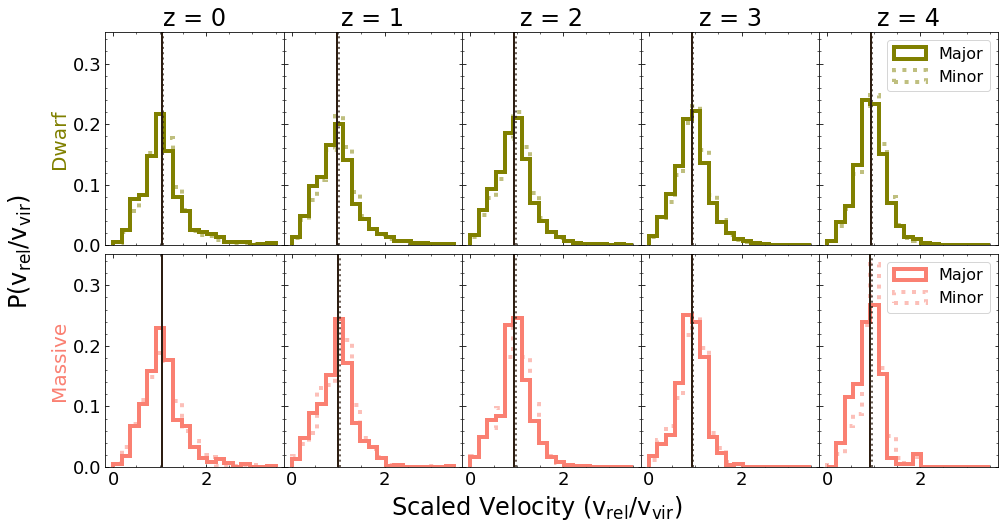

In [243]:
# plot_sveldist(10,False)
# plot_sveldist(100,False)
plot_sveldist(1000,True)

### Scaled Combo

In [11]:
def plot_scaledcombodist(reals, save=False):
    
    f = h5py.File(f"{paths.path_plotdata}sepveldist.hdf5",'r')
    distdata = f[f"{reals} Realizations"]

    print(f"for {reals} realizations")
    
    ### begin plot ###
    fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey=True, sharex="col", 
                           gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,1],'wspace': 0.02,"hspace":0.04})

    ax_ds = ax[0][0]
    ax_dv = ax[0][1]
    ax_ms = ax[1][0]
    ax_mv = ax[1][1]

    ax_ds.set(title="Scaled Separation")
    ax_dv.set(title="Scaled Velocity")
    alphs = [1,0.8,0.6,0.4,0.2]

    for i in range(5):        
        ds, dv = {}, {}
        ms, mv = {}, {}
        
        for key,val in distdata[f'z={i}']["dwarf"]["Scaled Separation"].items():
            ds[key] = np.array(val)
        for key,val in distdata[f'z={i}']["dwarf"]["Scaled Velocity"].items():
            dv[key] = np.array(val)  
            
        for key,val in distdata[f'z={i}']["massive"]["Scaled Separation"].items():
            ms[key] = np.array(val)
        for key,val in distdata[f'z={i}']["massive"]["Scaled Velocity"].items():
            mv[key] = np.array(val)

        bins_s = np.linspace(0,5.5,20)
        bins_v = np.linspace(0,3.5,20)

        # Illustris Major pairs
        ax_ds.hist(ds['major'],bins=bins_s,weights=np.ones(len(ds['major']))/len(ds['major']),histtype="step", color=palette['dwarf'], lw=4,alpha=alphs[i],label=f"z={i}")
        ax_dv.hist(dv['major'],bins=bins_v,weights=np.ones(len(dv['major']))/len(dv['major']),histtype="step", color=palette['dwarf'], lw=4,alpha=alphs[i],label=f"z={i}")

        ax_ms.hist(ms['major'],bins=bins_s,weights=np.ones(len(ms['major']))/len(ms['major']),histtype="step", color=palette['massive'], lw=4,alpha=alphs[i],label=f"z={i}")
        ax_mv.hist(mv['major'],bins=bins_v,weights=np.ones(len(mv['major']))/len(mv['major']),histtype="step", color=palette['massive'], lw=4,alpha=alphs[i],label=f"z={i}")

    for i in ax:
        i[1].set_xticks((0,0.5,1,1.5,2,2.5,3,3.5), labels=("0","0.5","1","1.5","2","2.5","3","3.5"))

    for xx in [ax_ds, ax_dv, ax_ms, ax_mv]:
        leg = xx.legend(loc='upper right',fontsize=16)

    ax_ms.set(xlabel=r"$\rm r_{sep}/r_{vir}$")
    ax_mv.set(xlabel=r"$\rm v_{rel}/v_{vir}$")
    ax_ds.set_ylabel("Dwarf",color=palette['dwarf'])
    ax_ms.set_ylabel("Massive",color=palette['massive'])
    fig.supylabel(r"P(x)",x=0.05)
    if save:
        plt.savefig(f"{paths.path_plots}scaledcombodist_{reals}.png",bbox_inches='tight',facecolor="white")
    plt.show()
    ### end plot ###
    
    f.close()

for 1000 realizations


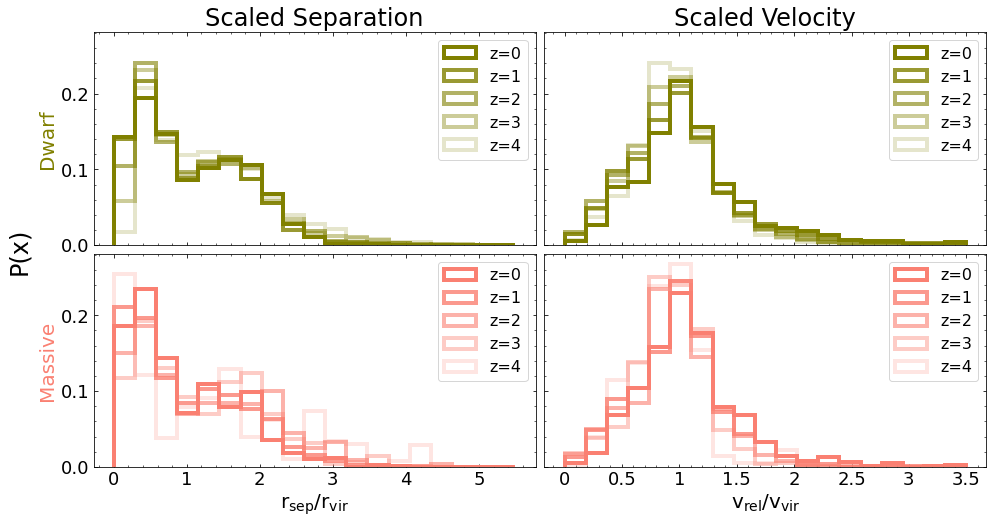

In [237]:
# plot_scaledcombodist(10, False)
# plot_scaledcombodist(100, False)
plot_scaledcombodist(1000, True)

In [7]:
# the above but for major + minor
def plot_scaledcombodist_add(reals, save=False):
    
    f = h5py.File(f"{paths.path_plotdata}sepveldist.hdf5",'r')
    distdata = f[f"{reals} Realizations"]

    print(f"for {reals} realizations")
    
    ### begin plot ###
    fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey=True, sharex="col", 
                           gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,1],'wspace': 0.02,"hspace":0.04})

    ax_ds = ax[0][0]
    ax_dv = ax[0][1]
    ax_ms = ax[1][0]
    ax_mv = ax[1][1]

    ax_ds.set(title="Scaled Separation")
    ax_dv.set(title="Scaled Velocity")
    alphs = [1,0.8,0.6,0.4,0.2]

    for i in range(5):        
        ds, dv = {}, {}
        ms, mv = {}, {}
        
        for key,val in distdata[f'z={i}']["dwarf"]["Scaled Separation"].items():
            ds[key] = np.array(val)
        for key,val in distdata[f'z={i}']["dwarf"]["Scaled Velocity"].items():
            dv[key] = np.array(val)  
            
        for key,val in distdata[f'z={i}']["massive"]["Scaled Separation"].items():
            ms[key] = np.array(val)
        for key,val in distdata[f'z={i}']["massive"]["Scaled Velocity"].items():
            mv[key] = np.array(val)

        bins_s = np.linspace(0,5.5,20)
        bins_v = np.linspace(0,3.5,20)
        
        dstot = np.concatenate((ds['major'],ds['minor']))
        dvtot = np.concatenate((dv['major'],dv['minor']))
        
        mstot = np.concatenate((ms['major'],ms['minor']))
        mvtot = np.concatenate((mv['major'],mv['minor']))

        # Illustris Major pairs
        ax_ds.hist(dstot,bins=bins_s,weights=np.ones(len(dstot))/len(dstot),histtype="step", color=palette['dwarf'], lw=4,alpha=alphs[i],label=f"z={i}")
        ax_dv.hist(dvtot,bins=bins_v,weights=np.ones(len(dvtot))/len(dvtot),histtype="step", color=palette['dwarf'], lw=4,alpha=alphs[i],label=f"z={i}")

        ax_ms.hist(mstot,bins=bins_s,weights=np.ones(len(mstot))/len(mstot),histtype="step", color=palette['massive'], lw=4,alpha=alphs[i],label=f"z={i}")
        ax_mv.hist(mvtot,bins=bins_v,weights=np.ones(len(mvtot))/len(mvtot),histtype="step", color=palette['massive'], lw=4,alpha=alphs[i],label=f"z={i}")

    for i in ax:
        i[1].set_xticks((0,0.5,1,1.5,2,2.5,3,3.5), labels=("0","0.5","1","1.5","2","2.5","3","3.5"))

    for xx in [ax_ds, ax_dv, ax_ms, ax_mv]:
        leg = xx.legend(loc='upper right',fontsize=16)

    ax_ms.set(xlabel=r"$\rm r_{sep}/r_{vir}$")
    ax_mv.set(xlabel=r"$\rm v_{rel}/v_{vir}$")
    ax_ds.set_ylabel("Dwarf",color=palette['dwarf'])
    ax_ms.set_ylabel("Massive",color=palette['massive'])
    fig.supylabel(r"P(x)",x=0.05)
    if save:
        plt.savefig(f"{paths.path_plots}scaledcombodist_add_{reals}.png",bbox_inches='tight',facecolor="white")
    plt.show()
    ### end plot ###
    
    f.close()

for 1000 realizations


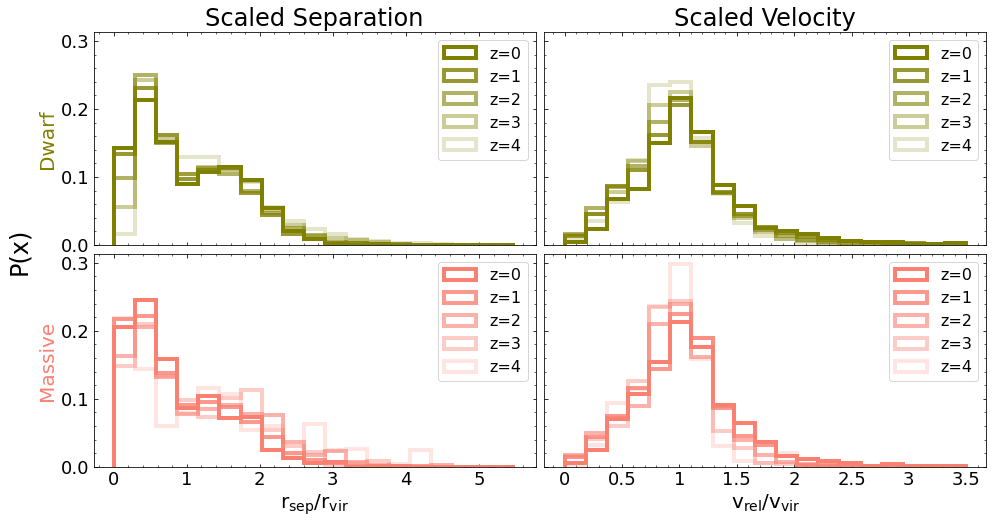

In [13]:
# plot_scaledcombodist_add(10, False)
# plot_scaledcombodist_add(100, False)
plot_scaledcombodist_add(1000, False)

for 1000 realizations


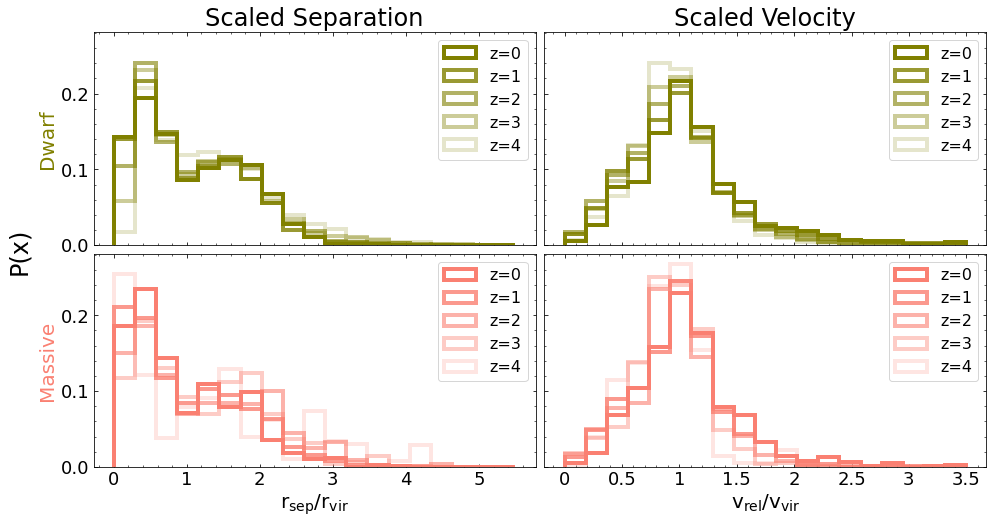

In [12]:
plot_scaledcombodist(1000, False)